<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_Viral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

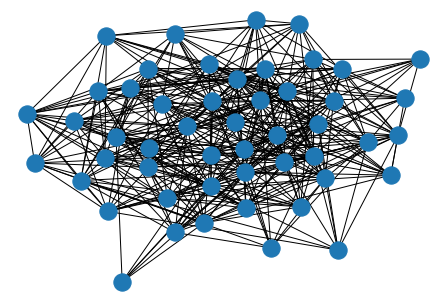

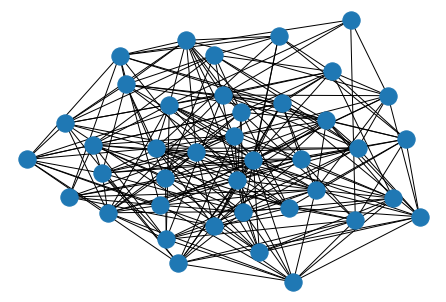

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [1 0 0 ... 0 1 0]]
[[0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:                       
                      PNN2 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      
                      PNN2 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .0625:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233]
[205, 399, 671, 919, 883, 789, 583, 402, 296, 252, 251, 247, 240, 221, 185, 146, 101, 70, 45, 25, 16, 14, 15, 15, 19, 18, 16, 13, 7, 4, 1, 0]
[0, 0, 0, 0, 205, 399, 671, 919, 1088, 1188, 1254, 1321, 1384, 1440, 1505, 1568, 1624, 1661, 1690, 1714, 1725, 1731, 1735, 1739, 1741, 1745, 1750, 1754, 1760, 1763, 1766, 1767]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233]]
[[], [205, 399, 671, 919, 883, 789, 583, 402, 296, 252, 251, 247, 240, 221, 185, 146, 101, 70, 45, 25, 16, 14, 15, 15, 19, 18, 16, 13, 7, 4, 1, 0]]
[[], [0, 0, 0, 0, 205, 399, 671, 919, 1088, 1188, 1254, 1321, 1384, 1440, 1505, 1568, 1624, 1661, 1690, 1714, 1725, 1731, 1735, 1739, 1741, 1

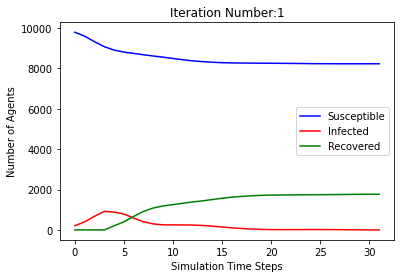

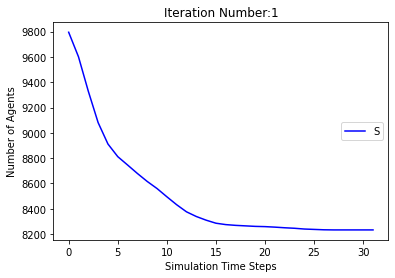

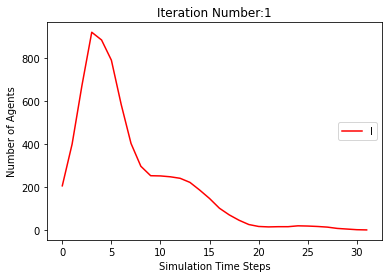

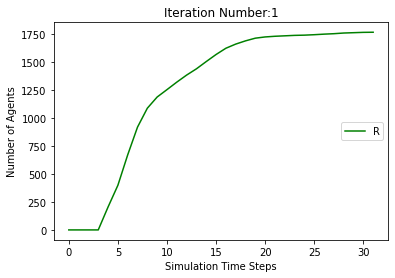

[9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534]
[205, 414, 710, 969, 957, 829, 568, 345, 183, 135, 125, 117, 97, 74, 56, 33, 24, 14, 7, 2, 0]
[0, 0, 0, 0, 205, 414, 710, 969, 1162, 1243, 1278, 1314, 1345, 1378, 1403, 1431, 1442, 1452, 1459, 1464, 1466]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534]]
[[], [205, 399, 671, 919, 883, 789, 583, 402, 296, 252, 251, 247, 240, 221, 185, 146, 101, 70, 45, 25, 16, 14, 15, 15, 19, 18, 16, 13, 7, 4, 1, 0], [205, 414, 710, 969, 957, 829, 568, 345, 183, 135, 125, 117, 97, 74, 56, 33, 24, 14, 7, 2, 0]]
[[], [0, 0, 0, 0, 205, 399, 671, 919, 1088, 1188, 1254, 1321, 1384, 1440, 1505, 1568, 1624, 1661, 

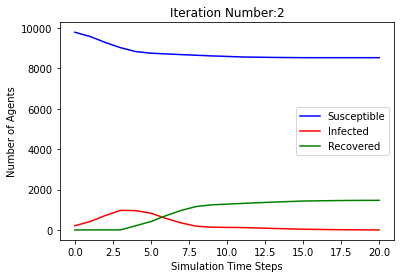

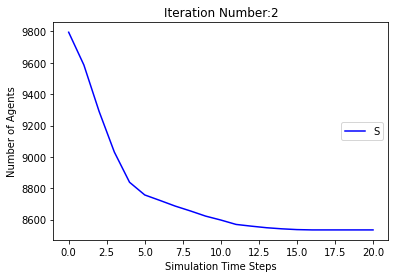

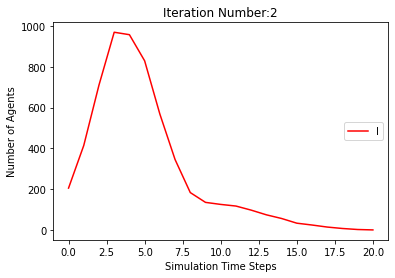

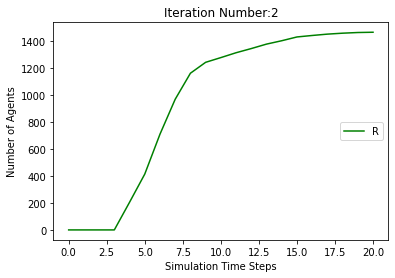

[9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601]
[205, 411, 670, 946, 897, 779, 577, 357, 232, 160, 119, 82, 59, 45, 29, 11, 4, 4, 4, 3, 2, 0]
[0, 0, 0, 0, 205, 411, 670, 946, 1102, 1190, 1247, 1303, 1334, 1350, 1366, 1385, 1393, 1395, 1395, 1396, 1397, 1399]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601]]
[[], [205, 399, 671, 919, 883, 789, 583, 402, 296, 252, 251, 247, 240, 221, 185, 146, 101, 70, 45, 25, 16, 14, 15, 15, 19, 18, 16, 13, 7, 4, 1, 0], [205, 414, 710, 969, 957, 829, 568, 345, 183, 1

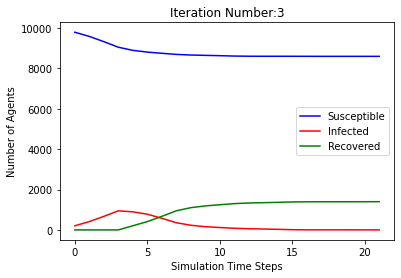

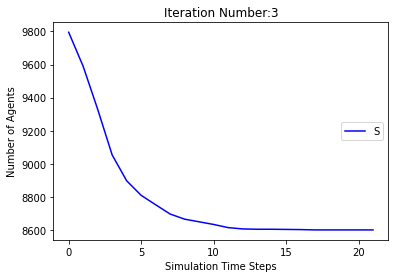

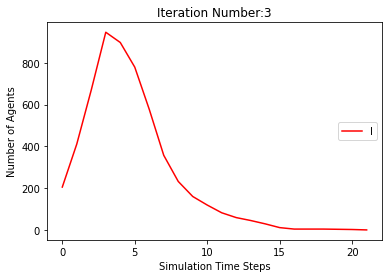

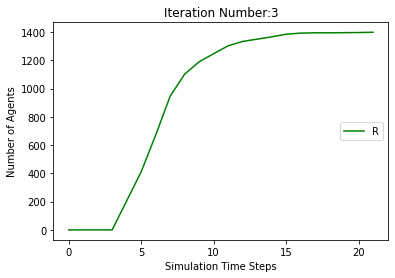

[9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462]
[205, 389, 652, 896, 908, 815, 616, 422, 251, 191, 154, 122, 94, 82, 71, 70, 63, 49, 38, 26, 16, 12, 7, 2, 1, 0]
[0, 0, 0, 0, 205, 389, 652, 896, 1113, 1204, 1268, 1318, 1364, 1395, 1422, 1440, 1458, 1477, 1493, 1510, 1521, 1526, 1531, 1536, 1537, 1538]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8

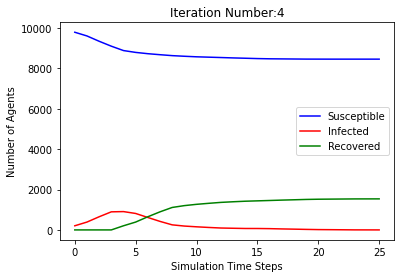

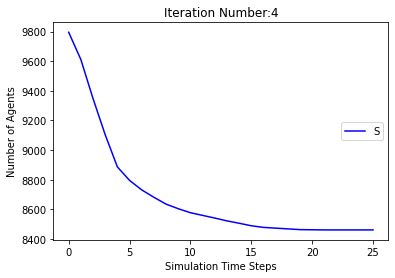

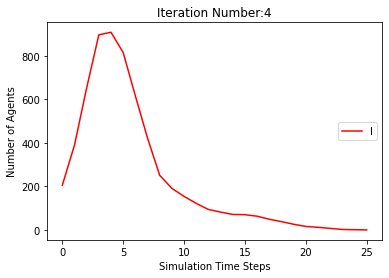

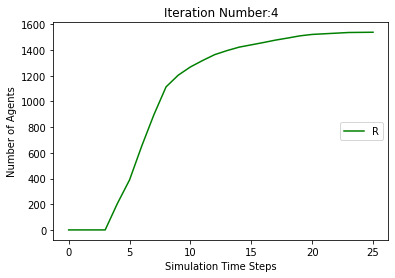

[9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 8557, 8557, 8555, 8555, 8555, 8555, 8555]
[205, 412, 699, 972, 946, 833, 597, 359, 215, 142, 111, 98, 73, 56, 36, 16, 6, 2, 2, 0]
[0, 0, 0, 0, 205, 412, 699, 972, 1151, 1245, 1296, 1331, 1366, 1387, 1407, 1429, 1439, 1443, 1443, 1445]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 

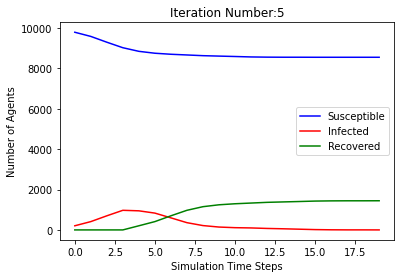

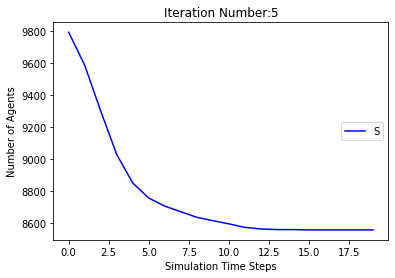

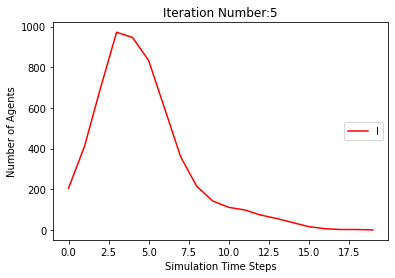

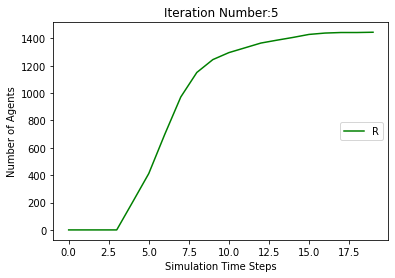

[9795, 9590, 9301, 9034, 8841, 8758, 8707, 8680, 8659, 8650, 8648, 8645, 8643, 8640, 8639, 8638, 8633, 8632, 8632, 8632, 8632, 8632]
[205, 410, 699, 966, 954, 832, 594, 354, 182, 108, 59, 35, 16, 10, 9, 7, 10, 8, 7, 6, 1, 0]
[0, 0, 0, 0, 205, 410, 699, 966, 1159, 1242, 1293, 1320, 1341, 1350, 1352, 1355, 1357, 1360, 1361, 1362, 1367, 1368]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 87

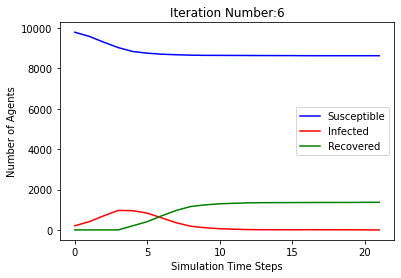

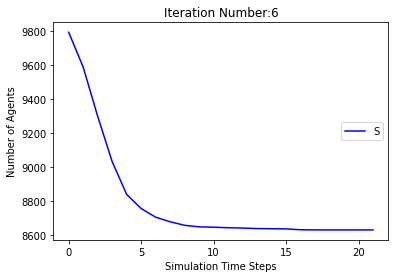

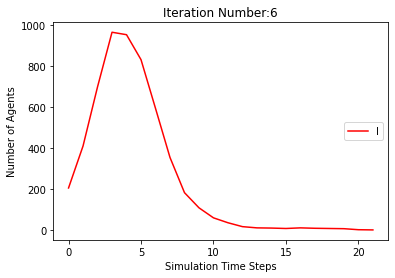

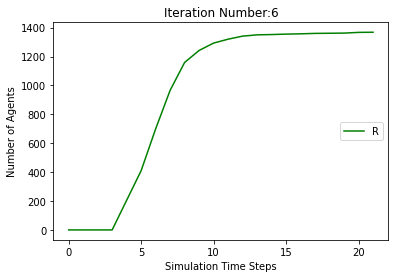

[9795, 9585, 9296, 9037, 8862, 8776, 8729, 8694, 8661, 8642, 8635, 8629, 8623, 8621, 8621, 8620, 8620, 8620, 8619, 8619, 8619, 8619, 8619]
[205, 415, 704, 963, 933, 809, 567, 343, 201, 134, 94, 65, 38, 21, 14, 9, 3, 1, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 205, 415, 704, 963, 1138, 1224, 1271, 1306, 1339, 1358, 1365, 1371, 1377, 1379, 1379, 1380, 1380, 1380, 1381]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028,

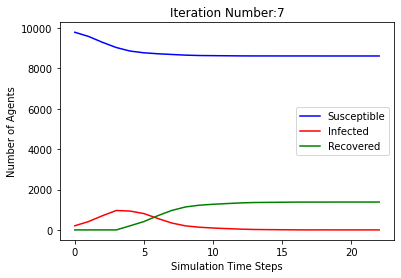

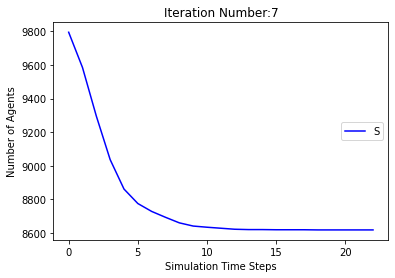

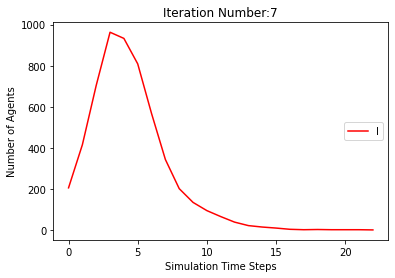

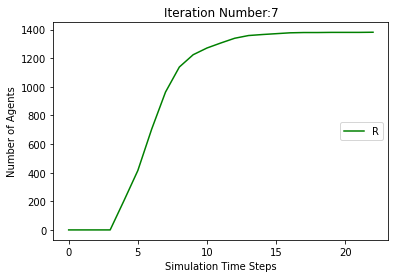

[9795, 9595, 9320, 9042, 8841, 8760, 8705, 8673, 8653, 8634, 8616, 8601, 8595, 8587, 8584, 8584, 8584, 8584, 8584]
[205, 405, 680, 958, 954, 835, 615, 369, 188, 126, 89, 72, 58, 47, 32, 17, 11, 3, 0]
[0, 0, 0, 0, 205, 405, 680, 958, 1159, 1240, 1295, 1327, 1347, 1366, 1384, 1399, 1405, 1413, 1416]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 855

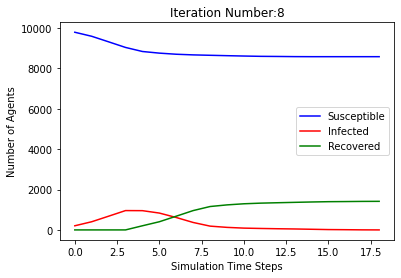

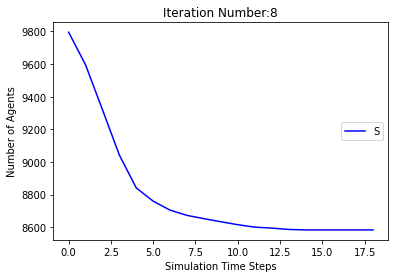

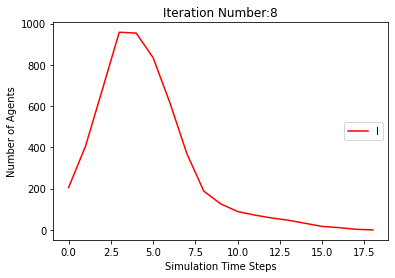

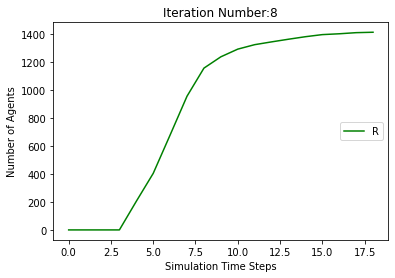

[9795, 9604, 9343, 9076, 8888, 8798, 8730, 8677, 8636, 8600, 8575, 8555, 8542, 8531, 8518, 8512, 8508, 8508, 8507, 8507, 8507, 8507, 8507]
[205, 396, 657, 924, 907, 806, 613, 399, 252, 198, 155, 122, 94, 69, 57, 43, 34, 23, 11, 5, 1, 1, 0]
[0, 0, 0, 0, 205, 396, 657, 924, 1112, 1202, 1270, 1323, 1364, 1400, 1425, 1445, 1458, 1469, 1482, 1488, 1492, 1492, 1493]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301,

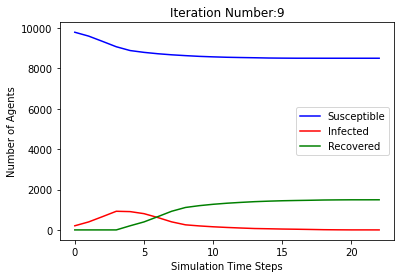

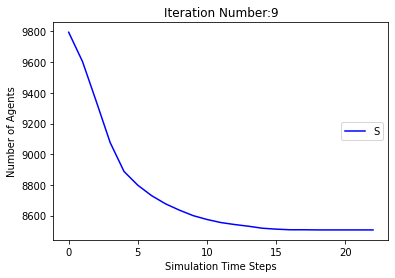

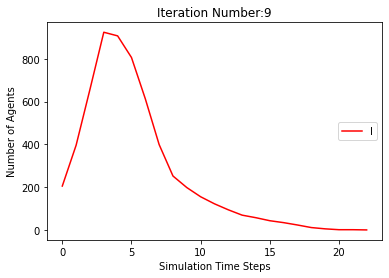

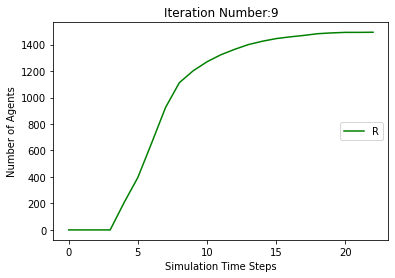

[9795, 9579, 9300, 9032, 8854, 8777, 8713, 8668, 8630, 8590, 8554, 8534, 8510, 8483, 8467, 8454, 8447, 8445, 8444, 8444, 8444, 8444, 8444]
[205, 421, 700, 968, 941, 802, 587, 364, 224, 187, 159, 134, 120, 107, 87, 80, 63, 38, 23, 10, 3, 1, 0]
[0, 0, 0, 0, 205, 421, 700, 968, 1146, 1223, 1287, 1332, 1370, 1410, 1446, 1466, 1490, 1517, 1533, 1546, 1553, 1555, 1556]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 93

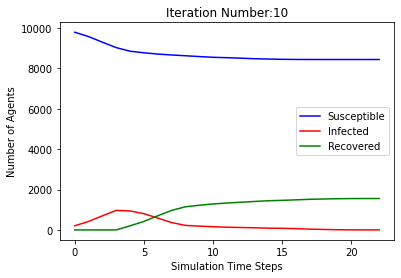

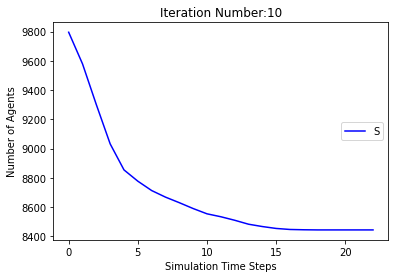

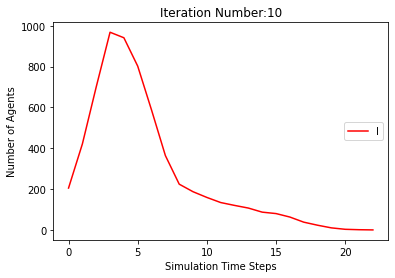

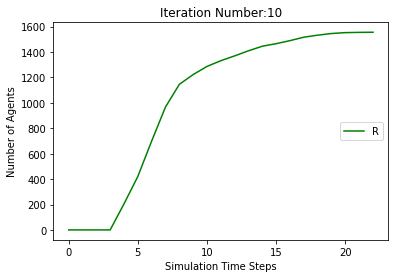

[9795, 9592, 9328, 9087, 8907, 8804, 8742, 8697, 8657, 8625, 8601, 8584, 8575, 8566, 8558, 8549, 8547, 8546, 8546, 8546, 8546, 8546]
[205, 408, 672, 913, 888, 788, 586, 390, 250, 179, 141, 113, 82, 59, 43, 35, 28, 20, 12, 3, 1, 0]
[0, 0, 0, 0, 205, 408, 672, 913, 1093, 1196, 1258, 1303, 1343, 1375, 1399, 1416, 1425, 1434, 1442, 1451, 1453, 1454]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 87

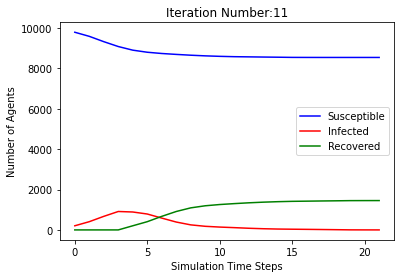

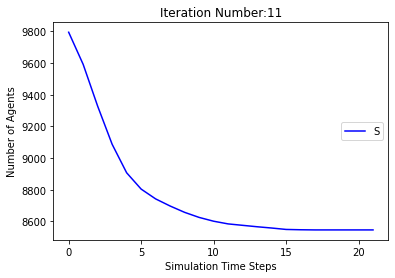

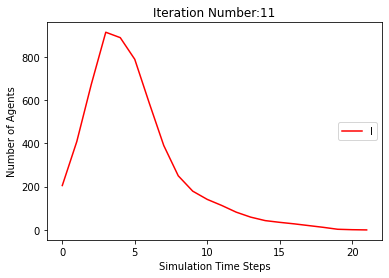

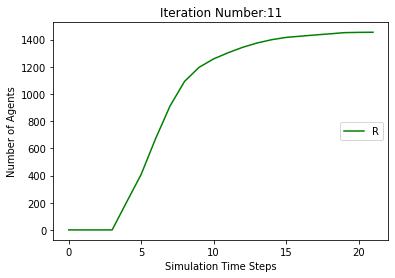

[9795, 9582, 9285, 9025, 8834, 8743, 8682, 8636, 8603, 8577, 8557, 8541, 8538, 8535, 8534, 8531, 8529, 8529, 8527, 8526, 8526, 8526, 8526, 8526]
[205, 418, 715, 975, 961, 839, 603, 389, 231, 166, 125, 95, 65, 42, 23, 10, 9, 6, 7, 5, 3, 3, 1, 0]
[0, 0, 0, 0, 205, 418, 715, 975, 1166, 1257, 1318, 1364, 1397, 1423, 1443, 1459, 1462, 1465, 1466, 1469, 1471, 1471, 1473, 1474]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 

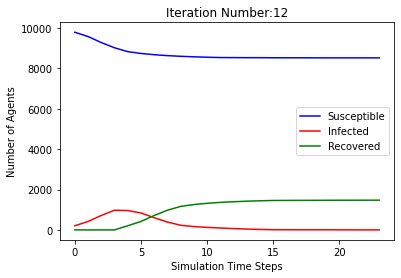

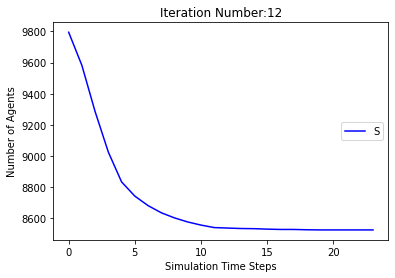

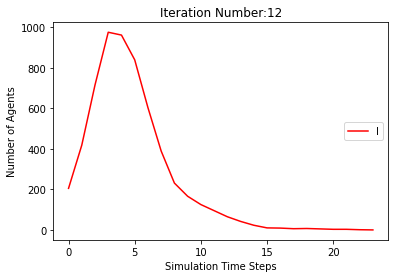

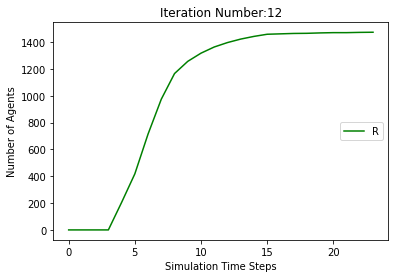

[9795, 9614, 9323, 9096, 8913, 8797, 8702, 8627, 8550, 8501, 8452, 8424, 8407, 8394, 8380, 8367, 8361, 8359, 8355, 8352, 8350, 8350, 8350, 8349, 8349, 8349, 8349, 8349]
[205, 386, 677, 904, 882, 817, 621, 469, 363, 296, 250, 203, 143, 107, 72, 57, 46, 35, 25, 15, 11, 9, 5, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 205, 386, 677, 904, 1087, 1203, 1298, 1373, 1450, 1499, 1548, 1576, 1593, 1606, 1620, 1633, 1639, 1641, 1645, 1648, 1650, 1650, 1650, 1651]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 

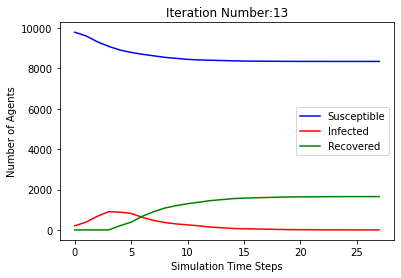

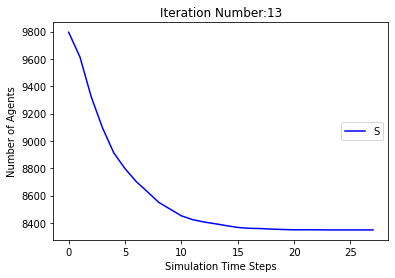

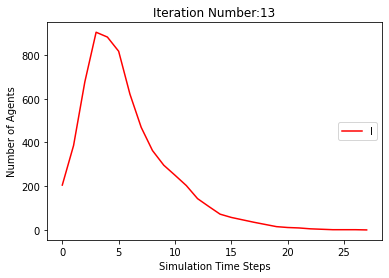

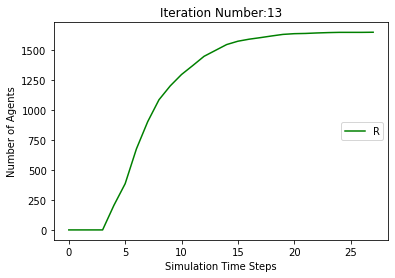

[9795, 9590, 9305, 9078, 8890, 8812, 8735, 8690, 8639, 8612, 8589, 8566, 8548, 8527, 8517, 8509, 8505, 8498, 8492, 8490, 8490, 8490, 8490, 8490]
[205, 410, 695, 922, 905, 778, 570, 388, 251, 200, 146, 124, 91, 85, 72, 57, 43, 29, 25, 19, 15, 8, 2, 0]
[0, 0, 0, 0, 205, 410, 695, 922, 1110, 1188, 1265, 1310, 1361, 1388, 1411, 1434, 1452, 1473, 1483, 1491, 1495, 1502, 1508, 1510]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [

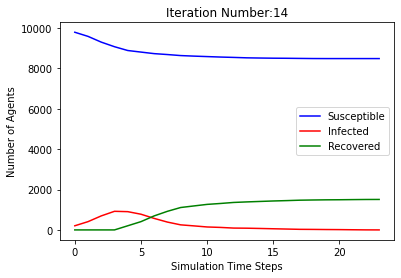

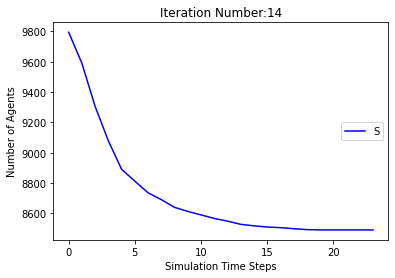

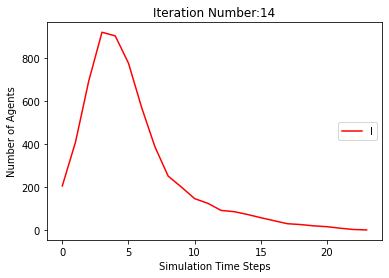

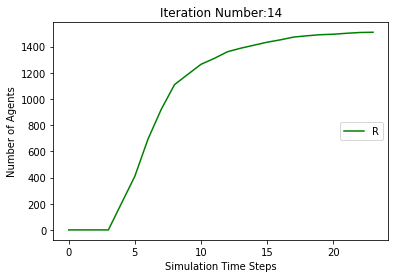

[9795, 9589, 9295, 9043, 8830, 8726, 8652, 8601, 8552, 8516, 8483, 8457, 8427, 8398, 8384, 8376, 8366, 8362, 8360, 8360, 8360, 8360, 8360]
[205, 411, 705, 957, 965, 863, 643, 442, 278, 210, 169, 144, 125, 118, 99, 81, 61, 36, 24, 16, 6, 2, 0]
[0, 0, 0, 0, 205, 411, 705, 957, 1170, 1274, 1348, 1399, 1448, 1484, 1517, 1543, 1573, 1602, 1616, 1624, 1634, 1638, 1640]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 93

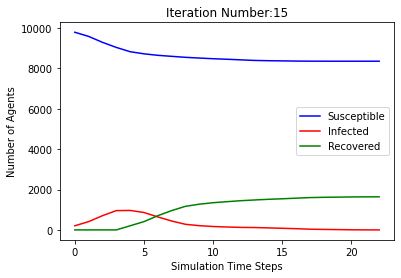

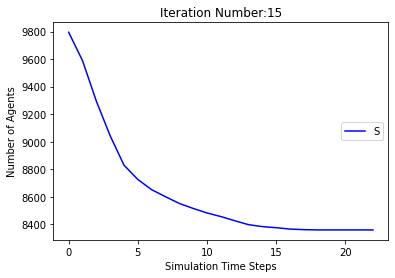

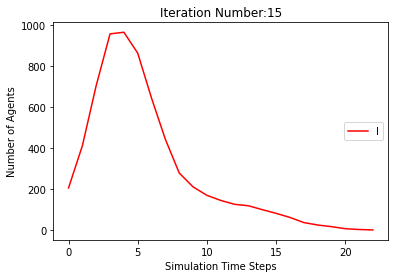

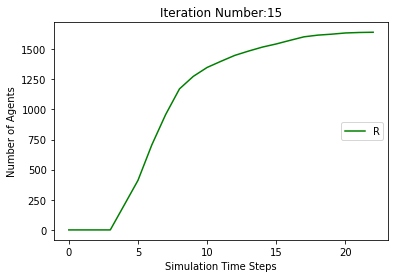

[9795, 9598, 9343, 9081, 8882, 8770, 8714, 8666, 8608, 8555, 8515, 8480, 8453, 8428, 8396, 8375, 8347, 8324, 8305, 8297, 8284, 8273, 8263, 8260, 8256, 8256, 8256, 8256, 8256]
[205, 402, 657, 919, 913, 828, 629, 415, 274, 215, 199, 186, 155, 127, 119, 105, 106, 104, 91, 78, 63, 51, 42, 37, 28, 17, 7, 4, 0]
[0, 0, 0, 0, 205, 402, 657, 919, 1118, 1230, 1286, 1334, 1392, 1445, 1485, 1520, 1547, 1572, 1604, 1625, 1653, 1676, 1695, 1703, 1716, 1727, 1737, 1740, 1744]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 

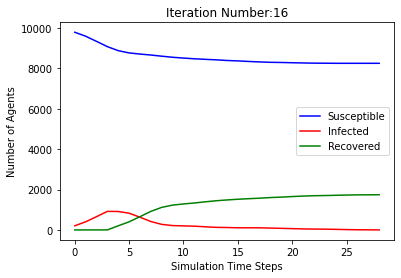

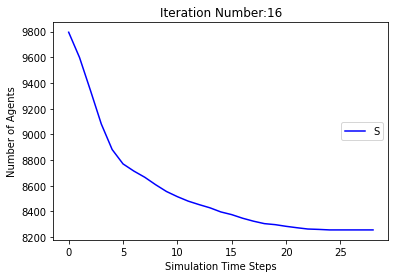

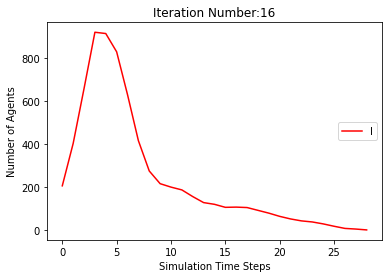

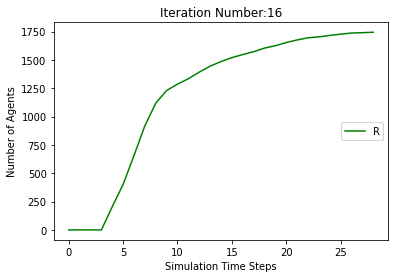

[9795, 9588, 9327, 9080, 8898, 8792, 8712, 8649, 8603, 8572, 8555, 8544, 8540, 8538, 8536, 8536, 8533, 8530, 8529, 8529, 8529, 8529, 8529]
[205, 412, 673, 920, 897, 796, 615, 431, 295, 220, 157, 105, 63, 34, 19, 8, 7, 8, 7, 7, 4, 1, 0]
[0, 0, 0, 0, 205, 412, 673, 920, 1102, 1208, 1288, 1351, 1397, 1428, 1445, 1456, 1460, 1462, 1464, 1464, 1467, 1470, 1471]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 902

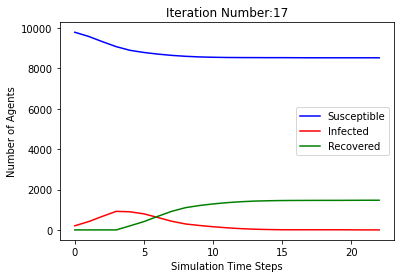

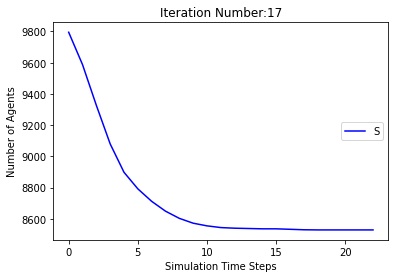

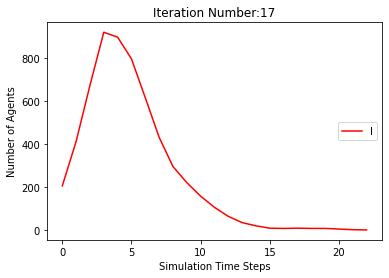

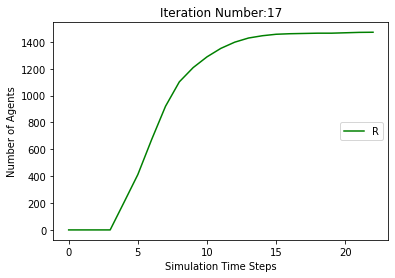

[9795, 9585, 9322, 9069, 8895, 8815, 8773, 8735, 8697, 8656, 8619, 8594, 8571, 8554, 8546, 8542, 8538, 8535, 8534, 8534, 8534, 8534, 8534]
[205, 415, 678, 931, 900, 770, 549, 334, 198, 159, 154, 141, 126, 102, 73, 52, 33, 19, 12, 8, 4, 1, 0]
[0, 0, 0, 0, 205, 415, 678, 931, 1105, 1185, 1227, 1265, 1303, 1344, 1381, 1406, 1429, 1446, 1454, 1458, 1462, 1465, 1466]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 930

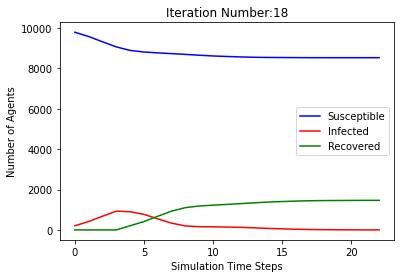

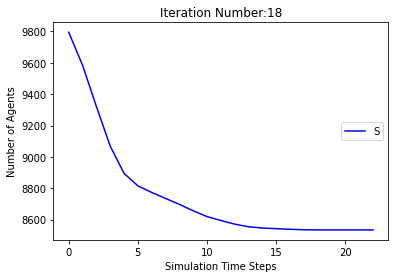

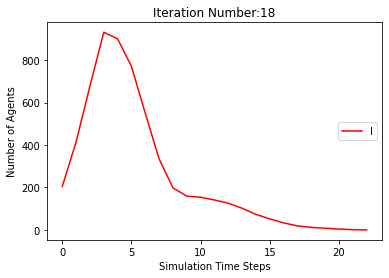

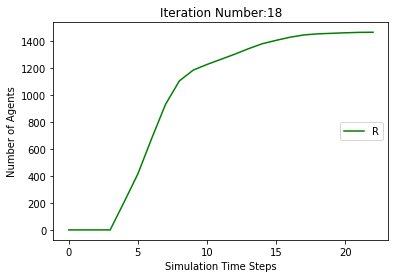

[9795, 9604, 9340, 9065, 8879, 8775, 8693, 8635, 8589, 8557, 8515, 8485, 8469, 8449, 8437, 8426, 8419, 8415, 8415, 8414, 8414, 8414, 8414, 8414]
[205, 396, 660, 935, 916, 829, 647, 430, 290, 218, 178, 150, 120, 108, 78, 59, 50, 34, 22, 12, 5, 1, 1, 0]
[0, 0, 0, 0, 205, 396, 660, 935, 1121, 1225, 1307, 1365, 1411, 1443, 1485, 1515, 1531, 1551, 1563, 1574, 1581, 1585, 1585, 1586]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], 

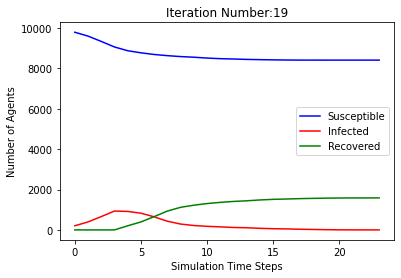

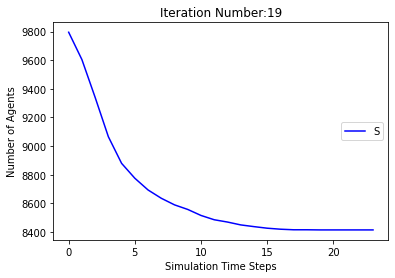

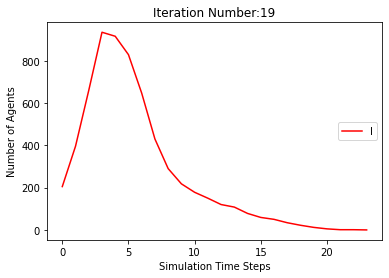

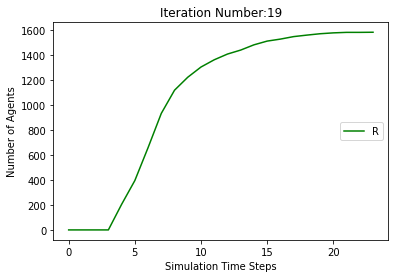

[9795, 9582, 9312, 9071, 8871, 8791, 8759, 8722, 8684, 8647, 8615, 8591, 8579, 8571, 8562, 8560, 8559, 8559, 8559, 8559, 8559]
[205, 418, 688, 929, 924, 791, 553, 349, 187, 144, 144, 131, 105, 76, 53, 31, 20, 12, 3, 1, 0]
[0, 0, 0, 0, 205, 418, 688, 929, 1129, 1209, 1241, 1278, 1316, 1353, 1385, 1409, 1421, 1429, 1438, 1440, 1441]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669,

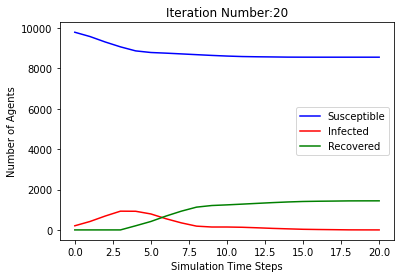

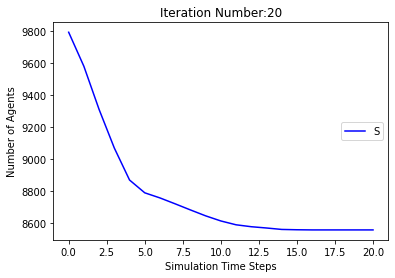

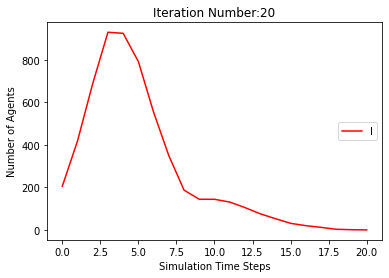

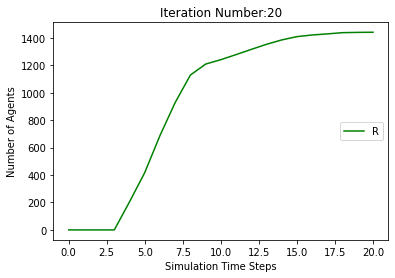

[9795, 9598, 9361, 9116, 8912, 8806, 8739, 8678, 8606, 8553, 8496, 8455, 8435, 8420, 8414, 8408, 8402, 8399, 8396, 8396, 8396, 8396, 8396]
[205, 402, 639, 884, 883, 792, 622, 438, 306, 253, 243, 223, 171, 133, 82, 47, 33, 21, 18, 12, 6, 3, 0]
[0, 0, 0, 0, 205, 402, 639, 884, 1088, 1194, 1261, 1322, 1394, 1447, 1504, 1545, 1565, 1580, 1586, 1592, 1598, 1601, 1604]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 93

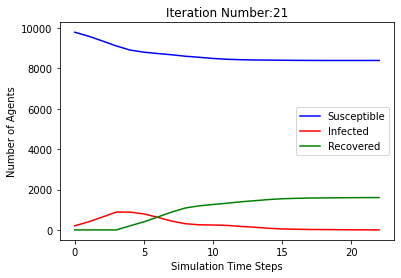

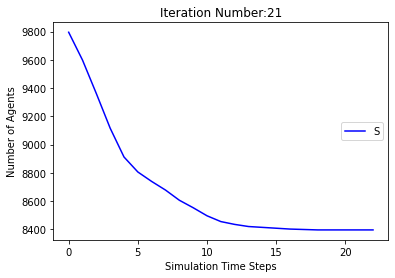

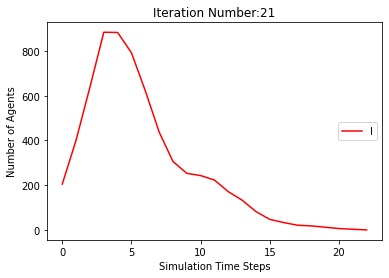

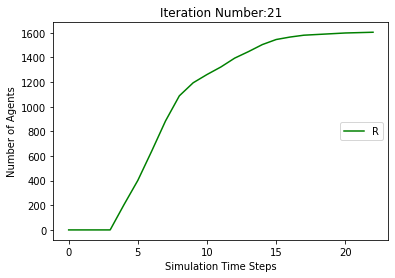

[9795, 9599, 9333, 9088, 8887, 8797, 8740, 8692, 8652, 8619, 8582, 8558, 8539, 8526, 8517, 8514, 8510, 8510, 8510, 8510, 8510]
[205, 401, 667, 912, 908, 802, 593, 396, 235, 178, 158, 134, 113, 93, 65, 44, 29, 16, 7, 4, 0]
[0, 0, 0, 0, 205, 401, 667, 912, 1113, 1203, 1260, 1308, 1348, 1381, 1418, 1442, 1461, 1474, 1483, 1486, 1490]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669,

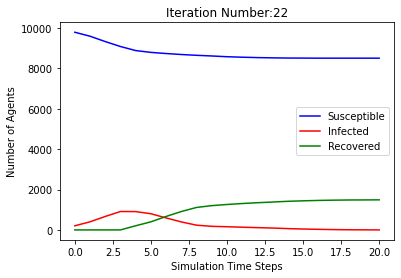

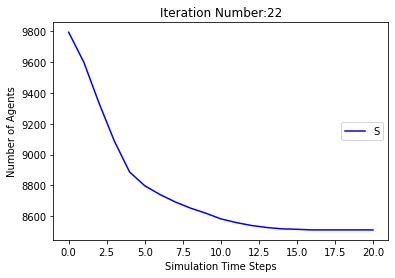

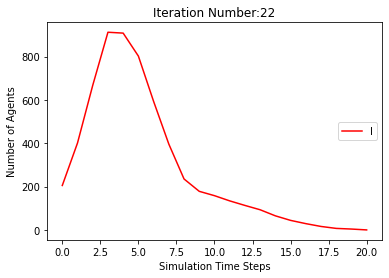

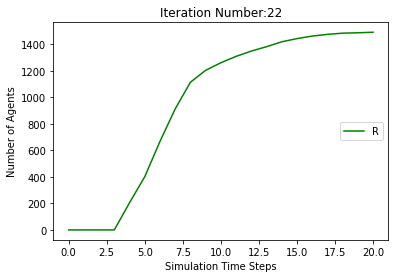

[9795, 9595, 9334, 9090, 8898, 8803, 8748, 8698, 8658, 8629, 8614, 8607, 8600, 8599, 8598, 8598, 8598, 8598, 8598]
[205, 405, 666, 910, 897, 792, 586, 392, 240, 174, 134, 91, 58, 30, 16, 9, 2, 1, 0]
[0, 0, 0, 0, 205, 405, 666, 910, 1102, 1197, 1252, 1302, 1342, 1371, 1386, 1393, 1400, 1401, 1402]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 8557

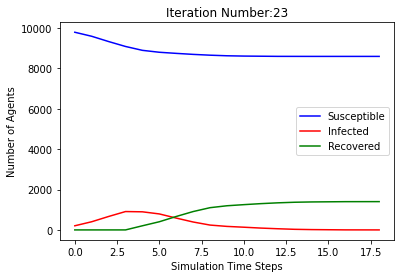

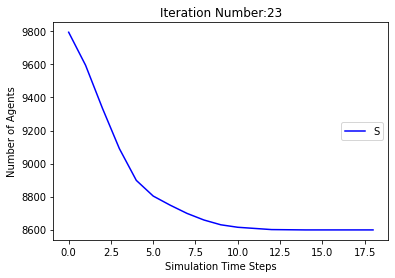

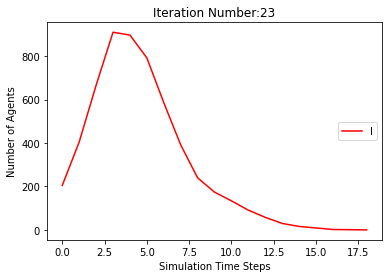

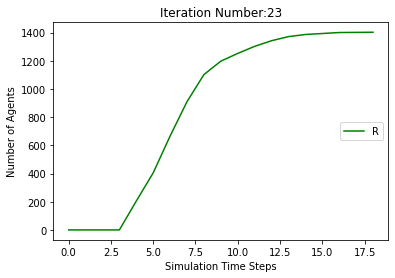

[9795, 9588, 9306, 9049, 8877, 8781, 8717, 8654, 8620, 8589, 8562, 8537, 8519, 8506, 8494, 8489, 8484, 8480, 8478, 8478, 8477, 8477, 8477, 8477, 8477]
[205, 412, 694, 951, 918, 807, 589, 395, 257, 192, 155, 117, 101, 83, 68, 48, 35, 26, 16, 11, 7, 3, 1, 1, 0]
[0, 0, 0, 0, 205, 412, 694, 951, 1123, 1219, 1283, 1346, 1380, 1411, 1438, 1463, 1481, 1494, 1506, 1511, 1516, 1520, 1522, 1522, 1523]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462,

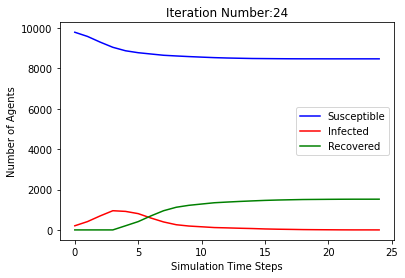

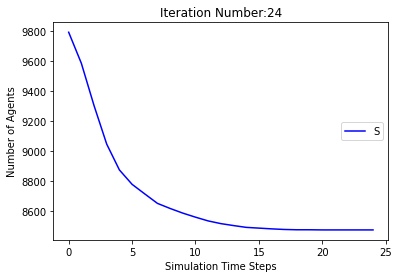

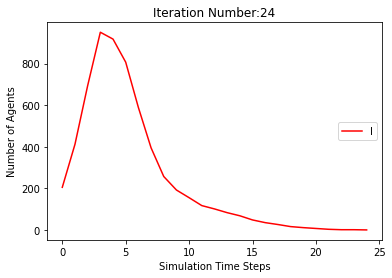

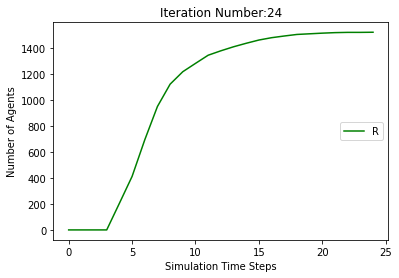

[9795, 9572, 9310, 9050, 8871, 8807, 8756, 8728, 8697, 8676, 8656, 8640, 8630, 8628, 8628, 8627, 8625, 8622, 8620, 8620, 8620, 8620, 8620]
[205, 428, 690, 950, 924, 765, 554, 322, 174, 131, 100, 88, 67, 48, 28, 13, 5, 6, 8, 7, 5, 2, 0]
[0, 0, 0, 0, 205, 428, 690, 950, 1129, 1193, 1244, 1272, 1303, 1324, 1344, 1360, 1370, 1372, 1372, 1373, 1375, 1378, 1380]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 902

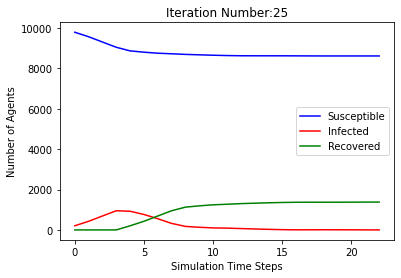

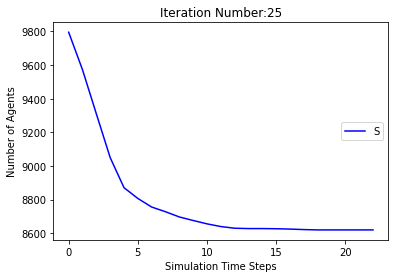

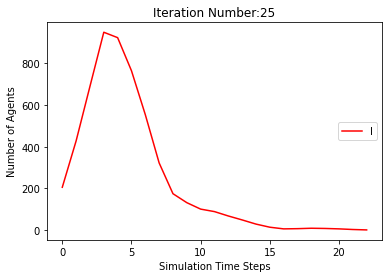

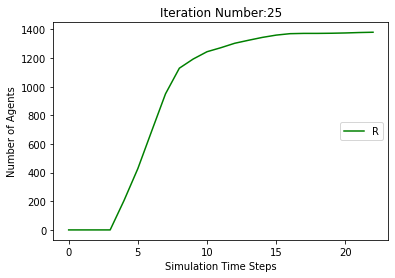

[9795, 9582, 9305, 9027, 8825, 8732, 8676, 8633, 8606, 8589, 8571, 8558, 8552, 8546, 8540, 8537, 8535, 8532, 8532, 8532, 8532, 8532]
[205, 418, 695, 973, 970, 850, 629, 394, 219, 143, 105, 75, 54, 43, 31, 21, 17, 14, 8, 5, 3, 0]
[0, 0, 0, 0, 205, 418, 695, 973, 1175, 1268, 1324, 1367, 1394, 1411, 1429, 1442, 1448, 1454, 1460, 1463, 1465, 1468]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755

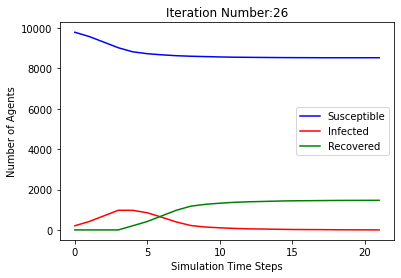

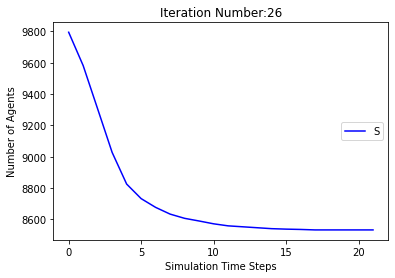

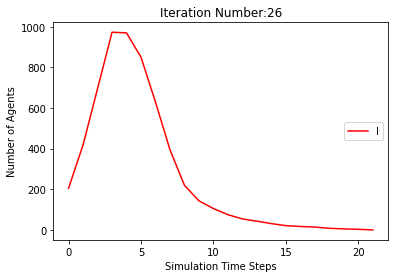

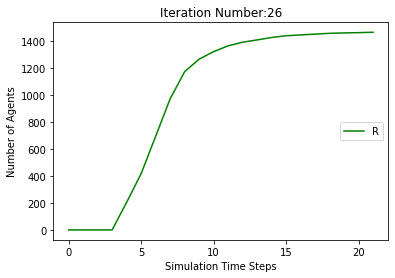

[9795, 9573, 9287, 9018, 8817, 8709, 8632, 8559, 8501, 8459, 8423, 8394, 8372, 8354, 8341, 8334, 8332, 8332, 8332, 8332, 8332]
[205, 427, 713, 982, 978, 864, 655, 459, 316, 250, 209, 165, 129, 105, 82, 60, 40, 22, 9, 2, 0]
[0, 0, 0, 0, 205, 427, 713, 982, 1183, 1291, 1368, 1441, 1499, 1541, 1577, 1606, 1628, 1646, 1659, 1666, 1668]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669

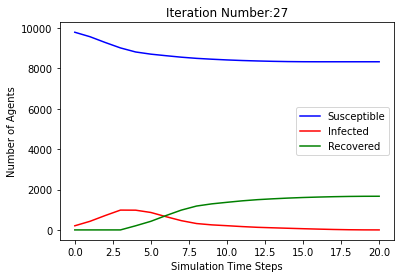

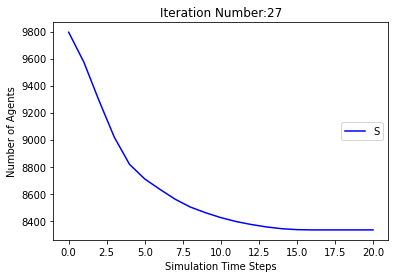

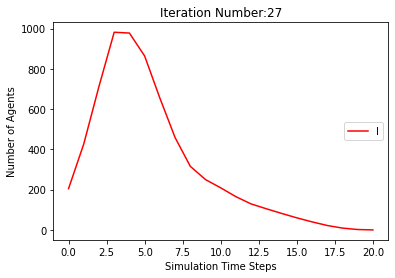

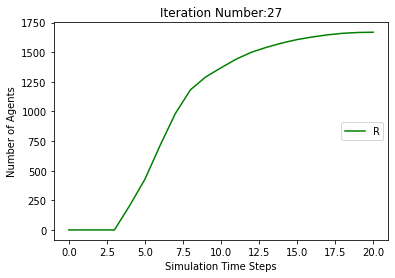

[9795, 9609, 9365, 9118, 8916, 8798, 8715, 8649, 8601, 8556, 8506, 8454, 8407, 8381, 8355, 8337, 8325, 8315, 8308, 8303, 8300, 8300, 8298, 8297, 8297, 8297, 8297, 8297]
[205, 391, 635, 882, 879, 811, 650, 469, 315, 242, 209, 195, 194, 175, 151, 117, 82, 66, 47, 34, 25, 15, 10, 6, 3, 3, 1, 0]
[0, 0, 0, 0, 205, 391, 635, 882, 1084, 1202, 1285, 1351, 1399, 1444, 1494, 1546, 1593, 1619, 1645, 1663, 1675, 1685, 1692, 1697, 1700, 1700, 1702, 1703]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 84

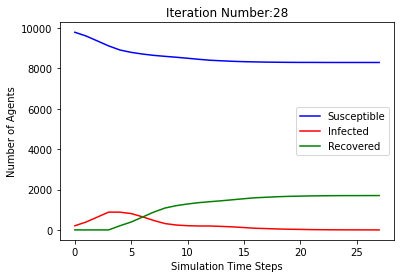

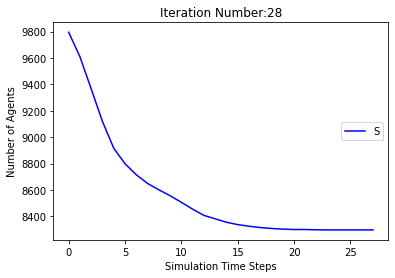

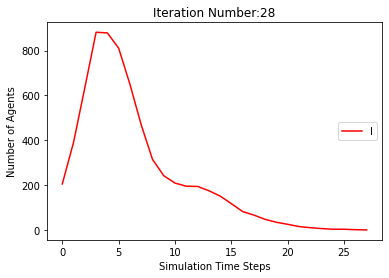

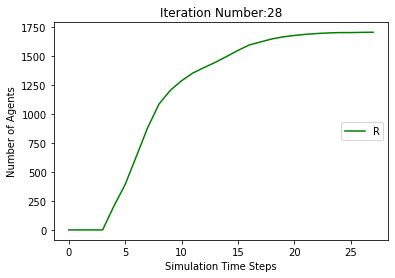

[9795, 9587, 9317, 9047, 8867, 8776, 8711, 8674, 8637, 8614, 8592, 8573, 8547, 8532, 8513, 8494, 8480, 8471, 8464, 8458, 8455, 8454, 8454, 8454, 8454, 8454]
[205, 413, 683, 953, 928, 811, 606, 373, 230, 162, 119, 101, 90, 82, 79, 79, 67, 61, 49, 36, 25, 17, 10, 4, 1, 0]
[0, 0, 0, 0, 205, 413, 683, 953, 1133, 1224, 1289, 1326, 1363, 1386, 1408, 1427, 1453, 1468, 1487, 1506, 1520, 1529, 1536, 1542, 1545, 1546]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 

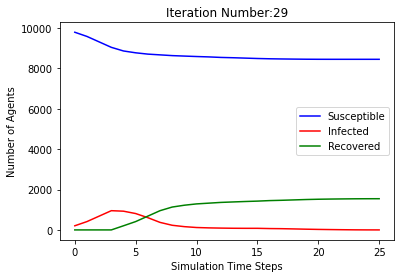

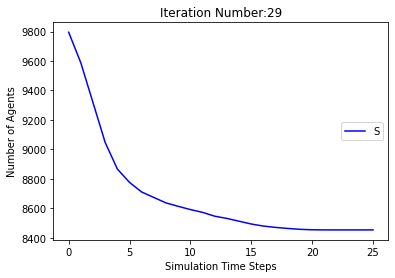

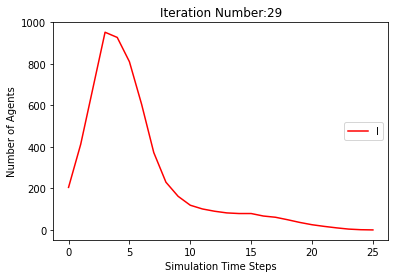

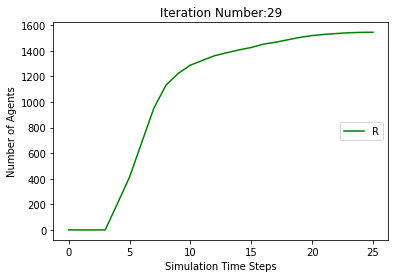

[9795, 9581, 9305, 9040, 8847, 8729, 8643, 8582, 8532, 8491, 8470, 8459, 8442, 8427, 8417, 8404, 8395, 8392, 8390, 8390, 8390, 8390, 8390]
[205, 419, 695, 960, 948, 852, 662, 458, 315, 238, 173, 123, 90, 64, 53, 55, 47, 35, 27, 14, 5, 2, 0]
[0, 0, 0, 0, 205, 419, 695, 960, 1153, 1271, 1357, 1418, 1468, 1509, 1530, 1541, 1558, 1573, 1583, 1596, 1605, 1608, 1610]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301

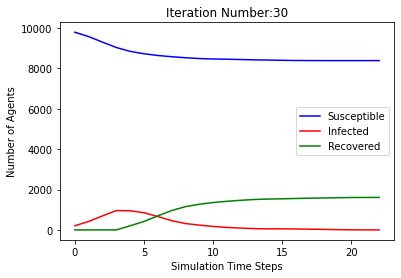

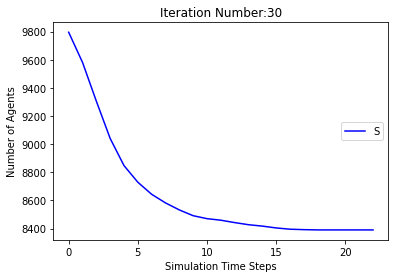

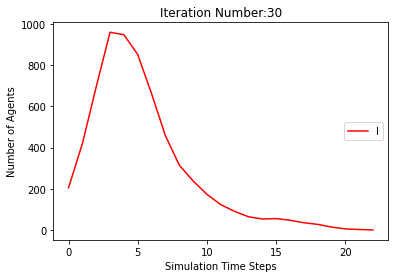

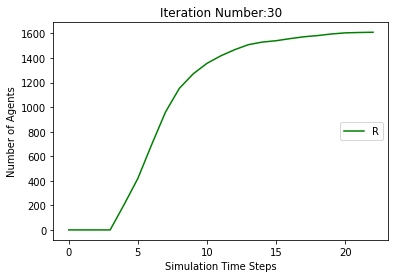

[9795, 9576, 9299, 9045, 8886, 8796, 8738, 8691, 8660, 8635, 8628, 8622, 8617, 8617, 8617, 8617, 8617]
[205, 424, 701, 955, 909, 780, 561, 354, 226, 161, 110, 69, 43, 18, 11, 5, 0]
[0, 0, 0, 0, 205, 424, 701, 955, 1114, 1204, 1262, 1309, 1340, 1365, 1372, 1378, 1383]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 8557, 8557, 8555, 8555, 8555, 8555

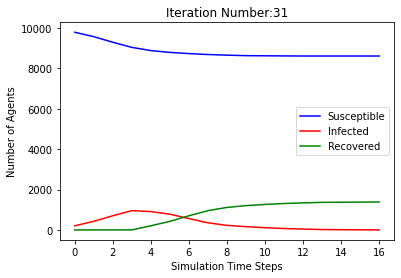

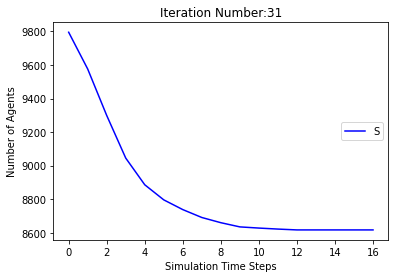

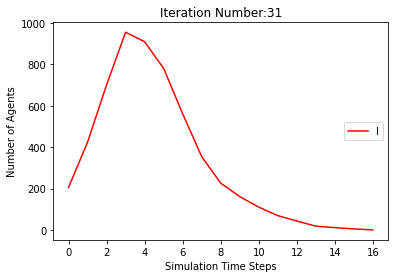

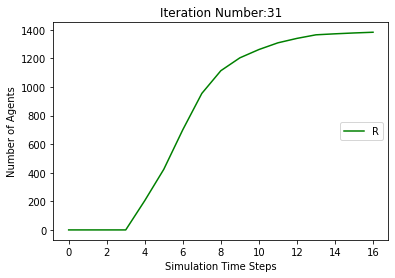

[9795, 9598, 9327, 9060, 8847, 8766, 8704, 8641, 8595, 8557, 8526, 8506, 8496, 8490, 8477, 8470, 8467, 8466, 8464, 8464, 8464, 8463, 8463, 8463, 8463, 8463]
[205, 402, 673, 940, 948, 832, 623, 419, 252, 209, 178, 135, 99, 67, 49, 36, 29, 24, 13, 6, 3, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 205, 402, 673, 940, 1153, 1234, 1296, 1359, 1405, 1443, 1474, 1494, 1504, 1510, 1523, 1530, 1533, 1534, 1536, 1536, 1536, 1537]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462

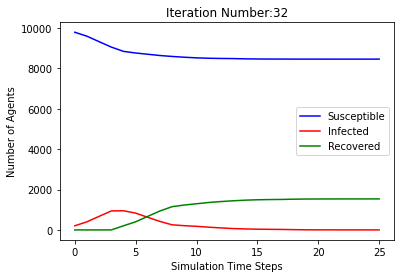

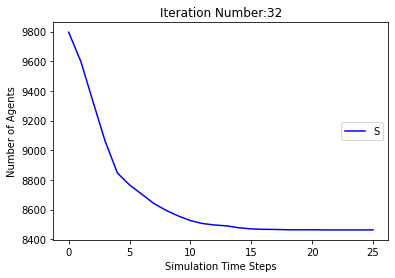

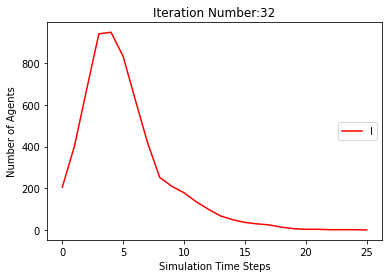

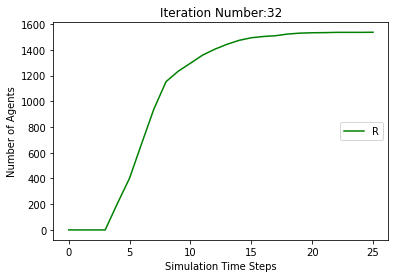

[9795, 9599, 9329, 9061, 8860, 8763, 8689, 8619, 8554, 8502, 8452, 8426, 8400, 8378, 8367, 8348, 8341, 8335, 8332, 8329, 8327, 8327, 8327, 8327, 8327]
[205, 401, 671, 939, 935, 836, 640, 442, 306, 261, 237, 193, 154, 124, 85, 78, 59, 43, 35, 19, 14, 8, 5, 2, 0]
[0, 0, 0, 0, 205, 401, 671, 939, 1140, 1237, 1311, 1381, 1446, 1498, 1548, 1574, 1600, 1622, 1633, 1652, 1659, 1665, 1668, 1671, 1673]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 846

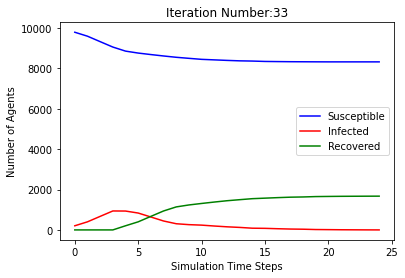

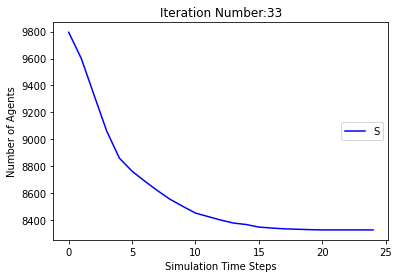

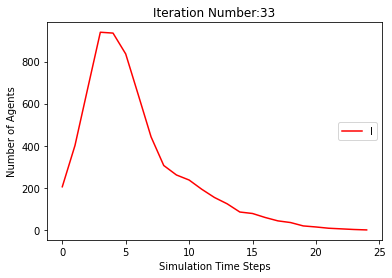

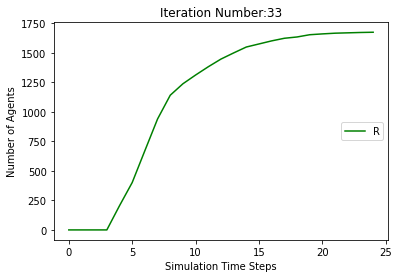

[9795, 9573, 9312, 9036, 8864, 8771, 8691, 8633, 8589, 8549, 8506, 8477, 8462, 8454, 8448, 8448, 8448, 8448, 8448]
[205, 427, 688, 964, 931, 802, 621, 403, 275, 222, 185, 156, 127, 95, 58, 29, 14, 6, 0]
[0, 0, 0, 0, 205, 427, 688, 964, 1136, 1229, 1309, 1367, 1411, 1451, 1494, 1523, 1538, 1546, 1552]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 

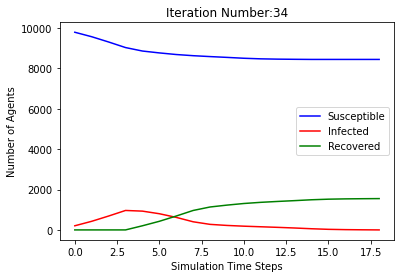

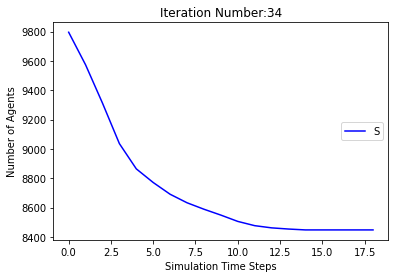

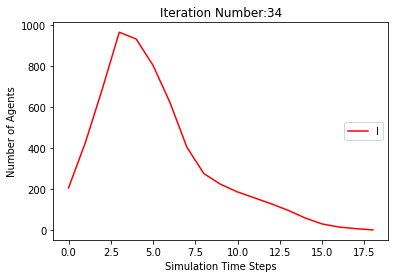

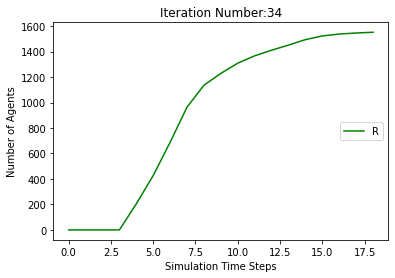

[9795, 9578, 9302, 9048, 8878, 8815, 8755, 8692, 8616, 8563, 8533, 8511, 8497, 8488, 8483, 8472, 8463, 8456, 8449, 8444, 8442, 8441, 8441, 8441, 8441, 8441]
[205, 422, 698, 952, 917, 763, 547, 356, 262, 252, 222, 181, 119, 75, 50, 39, 34, 32, 34, 28, 21, 15, 8, 3, 1, 0]
[0, 0, 0, 0, 205, 422, 698, 952, 1122, 1185, 1245, 1308, 1384, 1437, 1467, 1489, 1503, 1512, 1517, 1528, 1537, 1544, 1551, 1556, 1558, 1559]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 

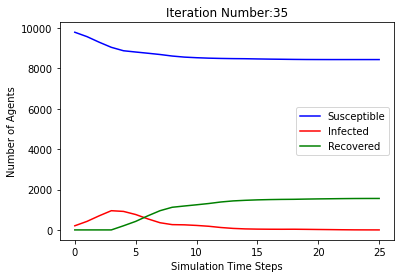

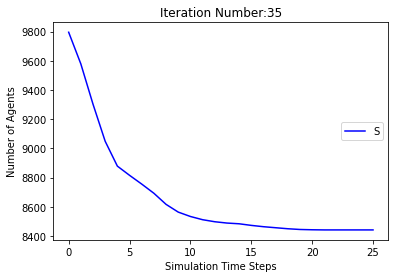

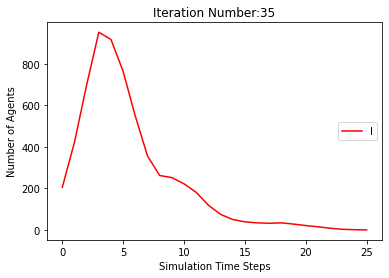

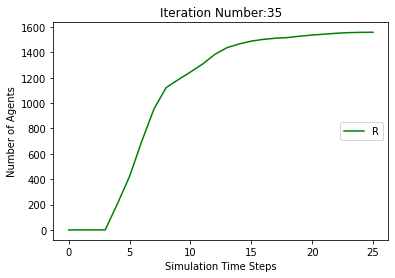

[9795, 9570, 9293, 9007, 8833, 8742, 8665, 8627, 8590, 8560, 8537, 8531, 8524, 8522, 8518, 8512, 8509, 8508, 8507, 8507, 8507, 8507, 8507]
[205, 430, 707, 993, 962, 828, 628, 380, 243, 182, 128, 96, 66, 38, 19, 19, 15, 14, 11, 5, 2, 1, 0]
[0, 0, 0, 0, 205, 430, 707, 993, 1167, 1258, 1335, 1373, 1410, 1440, 1463, 1469, 1476, 1478, 1482, 1488, 1491, 1492, 1493]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 

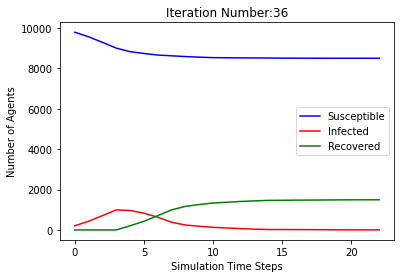

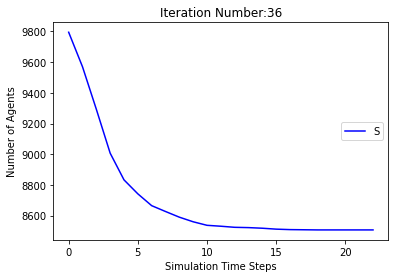

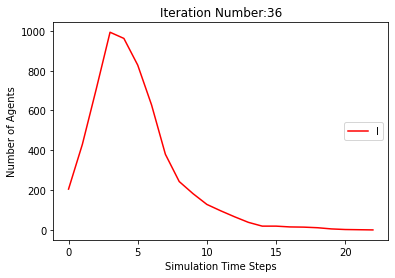

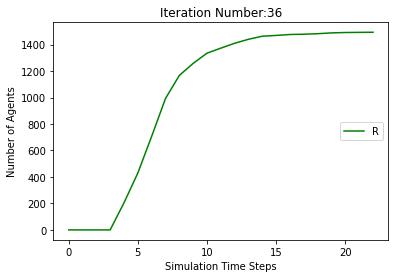

[9795, 9602, 9327, 9079, 8879, 8770, 8697, 8646, 8599, 8567, 8545, 8527, 8508, 8495, 8489, 8484, 8483, 8481, 8481, 8481, 8481, 8481]
[205, 398, 673, 921, 916, 832, 630, 433, 280, 203, 152, 119, 91, 72, 56, 43, 25, 14, 8, 3, 2, 0]
[0, 0, 0, 0, 205, 398, 673, 921, 1121, 1230, 1303, 1354, 1401, 1433, 1455, 1473, 1492, 1505, 1511, 1516, 1517, 1519]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 875

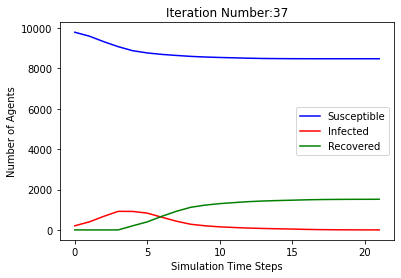

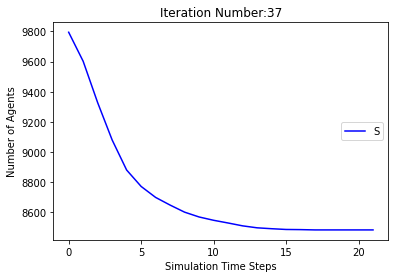

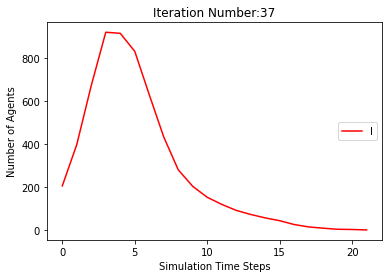

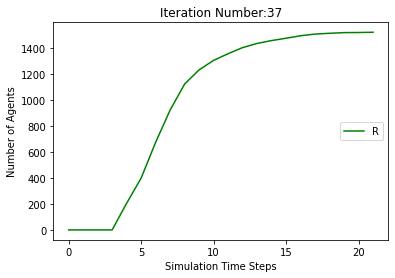

[9795, 9575, 9308, 9080, 8903, 8788, 8702, 8650, 8615, 8582, 8547, 8536, 8527, 8512, 8506, 8499, 8491, 8487, 8484, 8482, 8479, 8479, 8479, 8479, 8479]
[205, 425, 692, 920, 892, 787, 606, 430, 288, 206, 155, 114, 88, 70, 41, 37, 36, 25, 22, 17, 12, 8, 5, 3, 0]
[0, 0, 0, 0, 205, 425, 692, 920, 1097, 1212, 1298, 1350, 1385, 1418, 1453, 1464, 1473, 1488, 1494, 1501, 1509, 1513, 1516, 1518, 1521]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462,

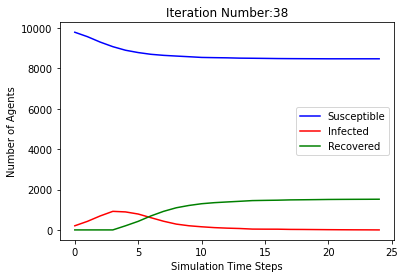

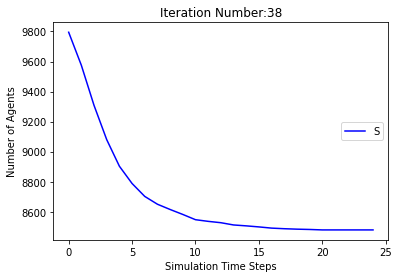

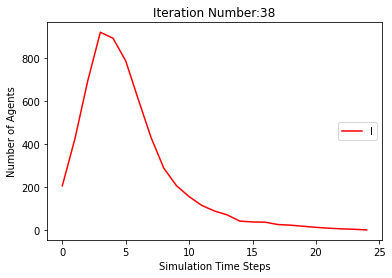

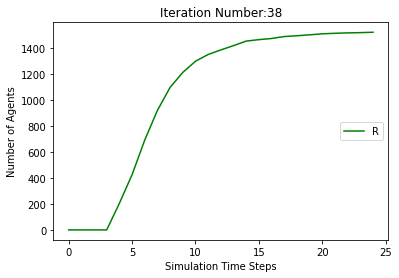

[9795, 9598, 9346, 9081, 8884, 8793, 8720, 8670, 8640, 8608, 8594, 8584, 8572, 8561, 8553, 8550, 8548, 8547, 8545, 8543, 8543, 8543, 8543, 8543]
[205, 402, 654, 919, 911, 805, 626, 411, 244, 185, 126, 86, 68, 47, 41, 34, 24, 14, 8, 7, 5, 4, 2, 0]
[0, 0, 0, 0, 205, 402, 654, 919, 1116, 1207, 1280, 1330, 1360, 1392, 1406, 1416, 1428, 1439, 1447, 1450, 1452, 1453, 1455, 1457]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795

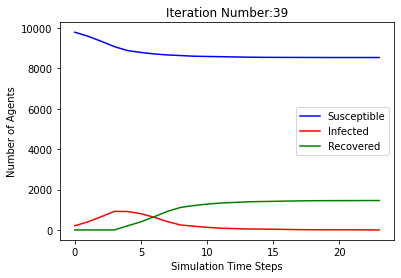

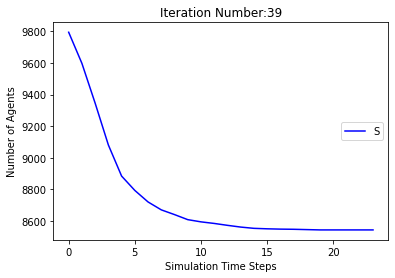

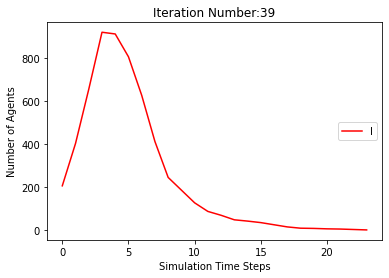

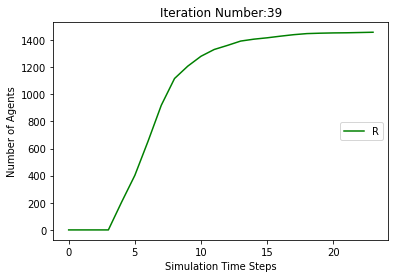

[9795, 9585, 9325, 9054, 8858, 8773, 8712, 8684, 8670, 8658, 8646, 8630, 8623, 8617, 8613, 8612, 8610, 8610, 8610, 8610, 8610]
[205, 415, 675, 946, 937, 812, 613, 370, 188, 115, 66, 54, 47, 41, 33, 18, 13, 7, 3, 2, 0]
[0, 0, 0, 0, 205, 415, 675, 946, 1142, 1227, 1288, 1316, 1330, 1342, 1354, 1370, 1377, 1383, 1387, 1388, 1390]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 863

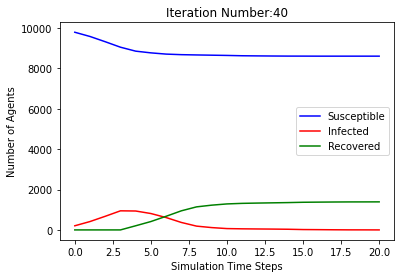

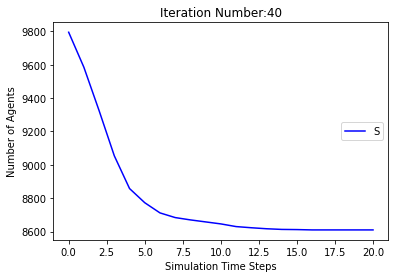

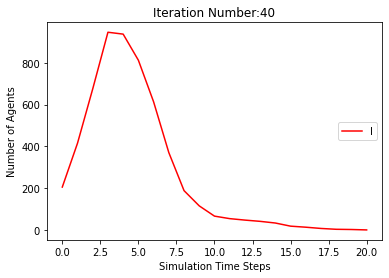

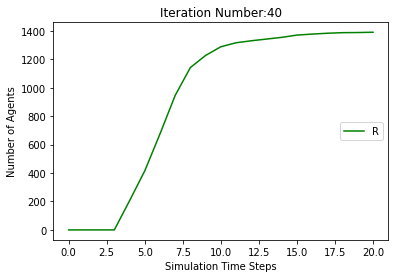

[9795, 9580, 9337, 9071, 8866, 8748, 8650, 8590, 8550, 8516, 8480, 8454, 8422, 8391, 8376, 8366, 8356, 8351, 8350, 8349, 8349, 8349, 8349, 8349]
[205, 420, 663, 929, 929, 832, 687, 481, 316, 232, 170, 136, 128, 125, 104, 88, 66, 40, 26, 17, 7, 2, 1, 0]
[0, 0, 0, 0, 205, 420, 663, 929, 1134, 1252, 1350, 1410, 1450, 1484, 1520, 1546, 1578, 1609, 1624, 1634, 1644, 1649, 1650, 1651]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462],

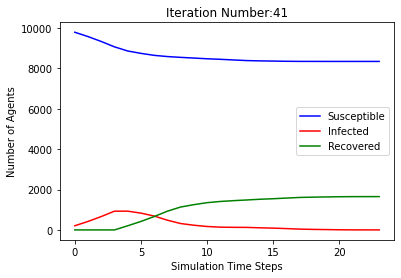

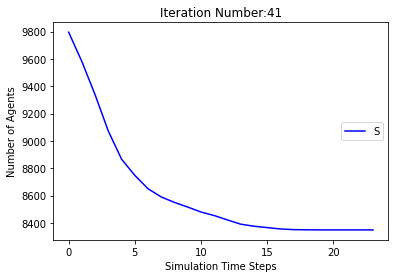

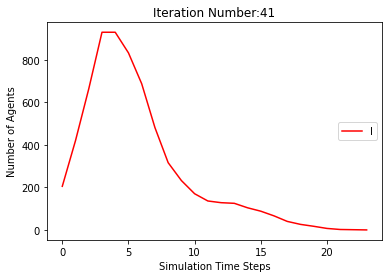

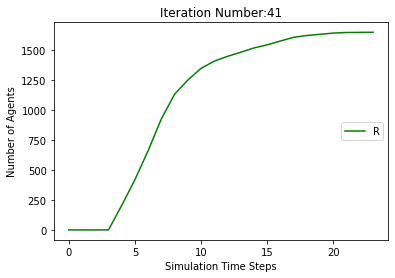

[9795, 9583, 9293, 9034, 8844, 8759, 8716, 8677, 8650, 8632, 8624, 8623, 8620, 8617, 8617, 8616, 8616, 8616, 8616, 8616]
[205, 417, 707, 966, 951, 824, 577, 357, 194, 127, 92, 54, 30, 15, 7, 7, 4, 1, 1, 0]
[0, 0, 0, 0, 205, 417, 707, 966, 1156, 1241, 1284, 1323, 1350, 1368, 1376, 1377, 1380, 1383, 1383, 1384]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 857

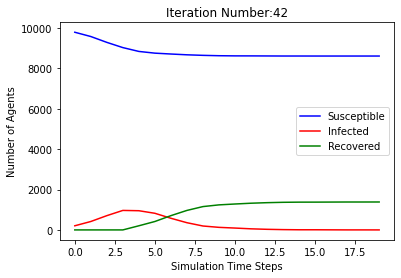

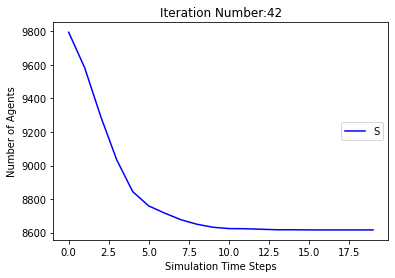

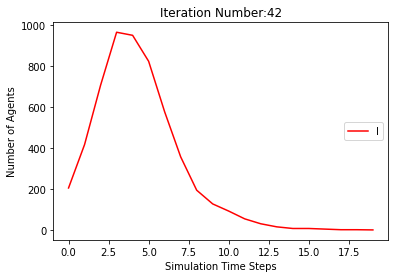

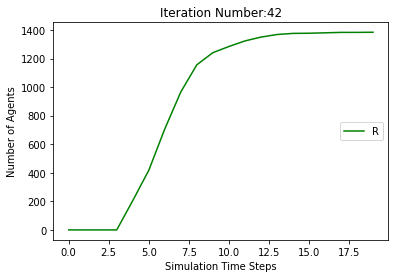

[9795, 9596, 9320, 9072, 8890, 8792, 8716, 8647, 8596, 8561, 8524, 8481, 8451, 8409, 8364, 8331, 8311, 8284, 8269, 8257, 8253, 8249, 8247, 8245, 8245, 8245, 8245, 8245]
[205, 404, 680, 928, 905, 804, 604, 425, 294, 231, 192, 166, 145, 152, 160, 150, 140, 125, 95, 74, 58, 35, 22, 12, 8, 4, 2, 0]
[0, 0, 0, 0, 205, 404, 680, 928, 1110, 1208, 1284, 1353, 1404, 1439, 1476, 1519, 1549, 1591, 1636, 1669, 1689, 1716, 1731, 1743, 1747, 1751, 1753, 1755]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507,

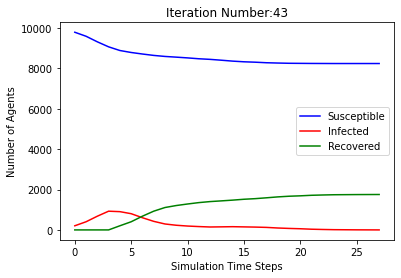

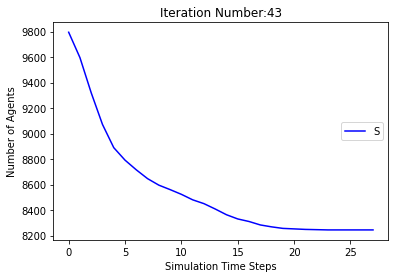

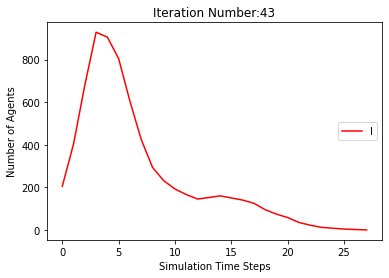

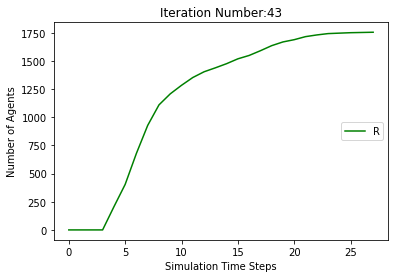

[9795, 9589, 9337, 9066, 8868, 8781, 8716, 8671, 8632, 8603, 8580, 8562, 8550, 8541, 8538, 8535, 8535, 8535, 8535, 8535]
[205, 411, 663, 934, 927, 808, 621, 395, 236, 178, 136, 109, 82, 62, 42, 27, 15, 6, 3, 0]
[0, 0, 0, 0, 205, 411, 663, 934, 1132, 1219, 1284, 1329, 1368, 1397, 1420, 1438, 1450, 1459, 1462, 1465]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593

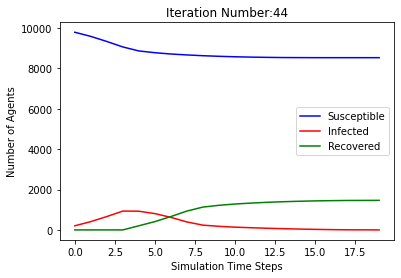

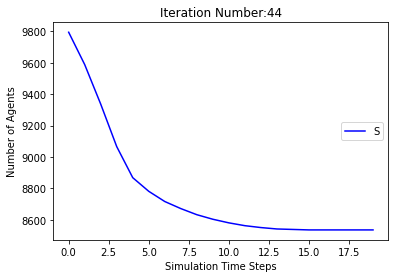

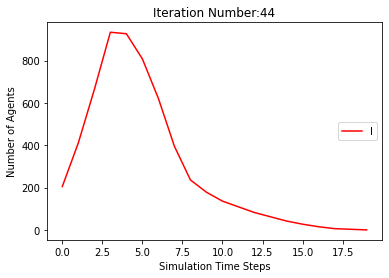

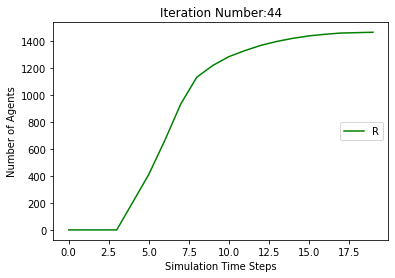

[9795, 9573, 9279, 9027, 8831, 8744, 8699, 8657, 8632, 8612, 8599, 8589, 8586, 8580, 8574, 8570, 8570, 8570, 8570, 8570]
[205, 427, 721, 973, 964, 829, 580, 370, 199, 132, 100, 68, 46, 32, 25, 19, 16, 10, 4, 0]
[0, 0, 0, 0, 205, 427, 721, 973, 1169, 1256, 1301, 1343, 1368, 1388, 1401, 1411, 1414, 1420, 1426, 1430]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593

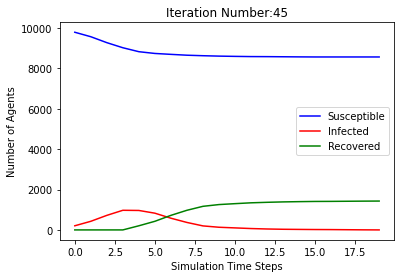

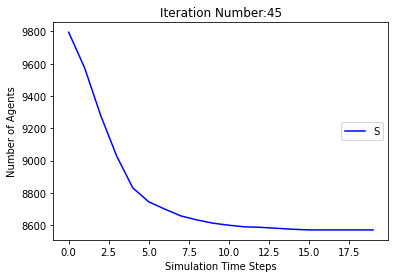

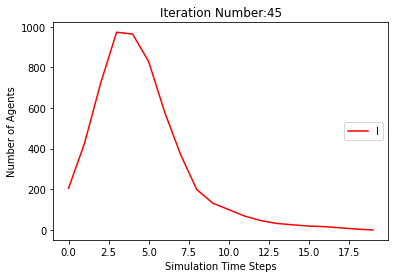

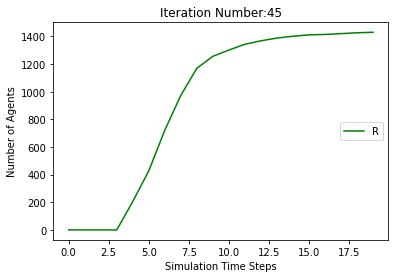

[9795, 9588, 9331, 9088, 8894, 8810, 8748, 8694, 8649, 8607, 8563, 8531, 8502, 8487, 8481, 8478, 8477, 8477, 8477, 8477, 8477]
[205, 412, 669, 912, 901, 778, 583, 394, 245, 203, 185, 163, 147, 120, 82, 53, 25, 10, 4, 1, 0]
[0, 0, 0, 0, 205, 412, 669, 912, 1106, 1190, 1252, 1306, 1351, 1393, 1437, 1469, 1498, 1513, 1519, 1522, 1523]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669

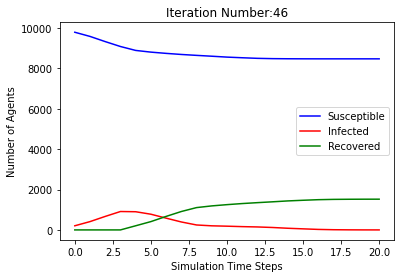

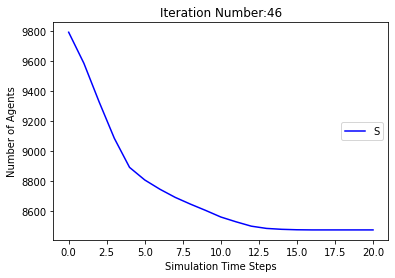

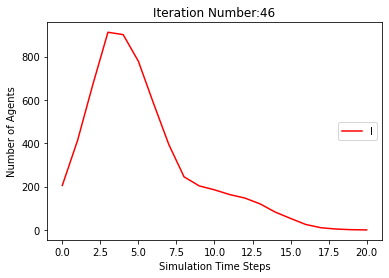

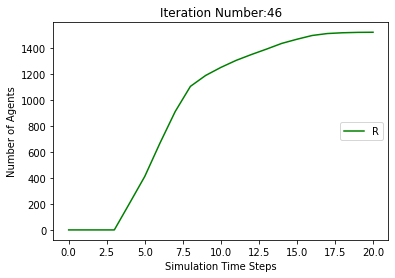

[9795, 9597, 9325, 9066, 8877, 8763, 8694, 8645, 8599, 8556, 8513, 8491, 8484, 8478, 8476, 8474, 8474, 8474, 8474, 8474]
[205, 403, 675, 934, 918, 834, 631, 421, 278, 207, 181, 154, 115, 78, 37, 17, 10, 4, 2, 0]
[0, 0, 0, 0, 205, 403, 675, 934, 1123, 1237, 1306, 1355, 1401, 1444, 1487, 1509, 1516, 1522, 1524, 1526]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 859

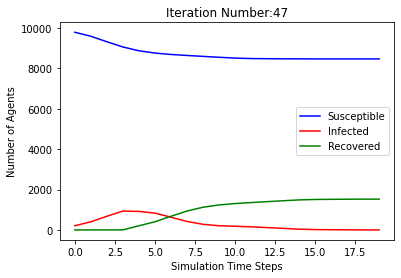

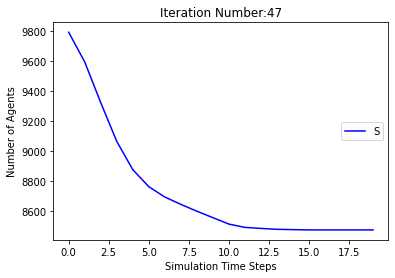

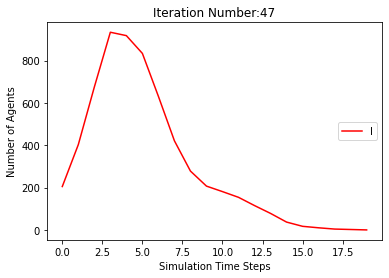

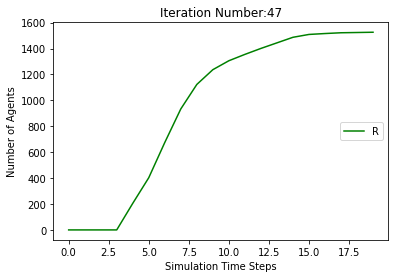

[9795, 9600, 9344, 9096, 8903, 8804, 8725, 8674, 8619, 8567, 8534, 8495, 8472, 8456, 8443, 8439, 8438, 8437, 8437, 8437, 8437, 8437]
[205, 400, 656, 904, 892, 796, 619, 422, 284, 237, 191, 179, 147, 111, 91, 56, 34, 19, 6, 2, 1, 0]
[0, 0, 0, 0, 205, 400, 656, 904, 1097, 1196, 1275, 1326, 1381, 1433, 1466, 1505, 1528, 1544, 1557, 1561, 1562, 1563]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8

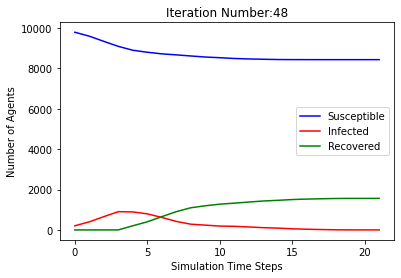

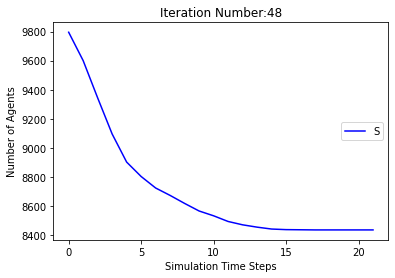

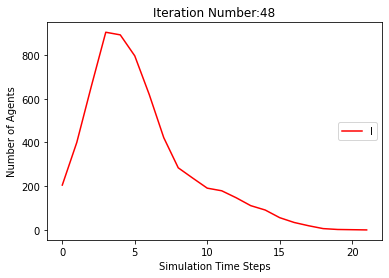

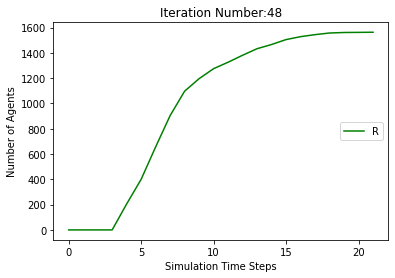

[9795, 9613, 9367, 9101, 8922, 8815, 8726, 8654, 8602, 8552, 8506, 8480, 8467, 8459, 8450, 8440, 8433, 8430, 8428, 8428, 8428, 8428, 8428]
[205, 387, 633, 899, 873, 798, 641, 447, 320, 263, 220, 174, 135, 93, 56, 40, 34, 29, 22, 12, 5, 2, 0]
[0, 0, 0, 0, 205, 387, 633, 899, 1078, 1185, 1274, 1346, 1398, 1448, 1494, 1520, 1533, 1541, 1550, 1560, 1567, 1570, 1572]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 930

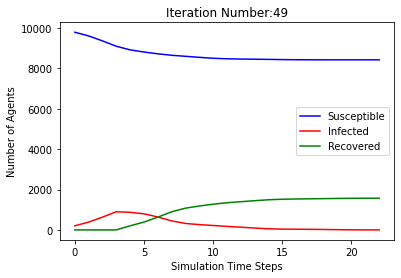

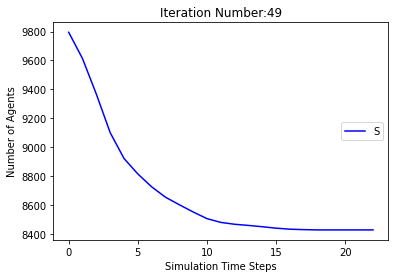

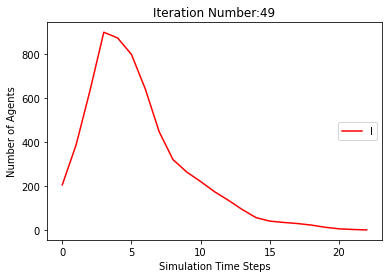

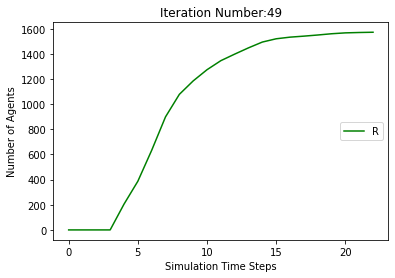

[9795, 9555, 9278, 9029, 8850, 8780, 8720, 8676, 8646, 8626, 8605, 8592, 8577, 8559, 8549, 8546, 8544, 8542, 8540, 8540, 8539, 8539, 8539, 8539, 8539]
[205, 445, 722, 971, 945, 775, 558, 353, 204, 154, 115, 84, 69, 67, 56, 46, 33, 17, 9, 6, 5, 3, 1, 1, 0]
[0, 0, 0, 0, 205, 445, 722, 971, 1150, 1220, 1280, 1324, 1354, 1374, 1395, 1408, 1423, 1441, 1451, 1454, 1456, 1458, 1460, 1460, 1461]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 846

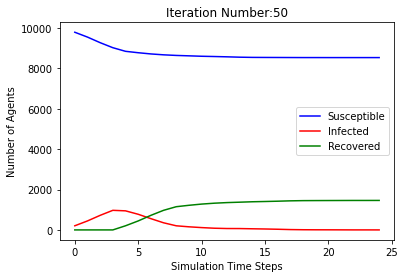

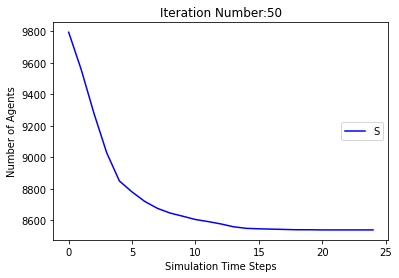

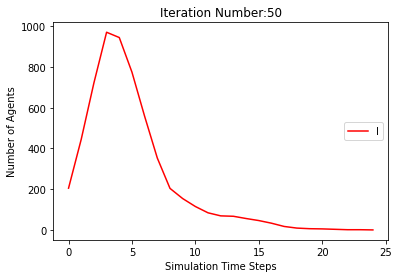

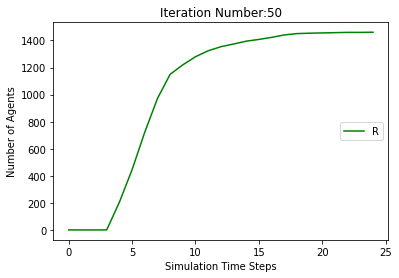

[9795, 9602, 9320, 9057, 8879, 8779, 8691, 8624, 8571, 8514, 8466, 8426, 8383, 8367, 8358, 8353, 8351, 8349, 8349, 8349, 8349, 8349]
[205, 398, 680, 943, 916, 823, 629, 433, 308, 265, 225, 198, 188, 147, 108, 73, 32, 18, 9, 4, 2, 0]
[0, 0, 0, 0, 205, 398, 680, 943, 1121, 1221, 1309, 1376, 1429, 1486, 1534, 1574, 1617, 1633, 1642, 1647, 1649, 1651]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 

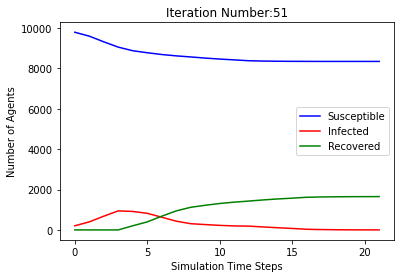

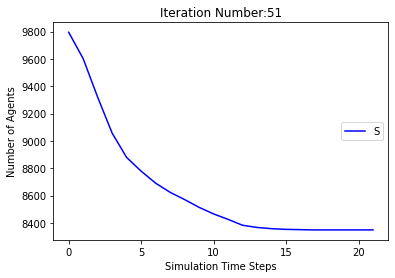

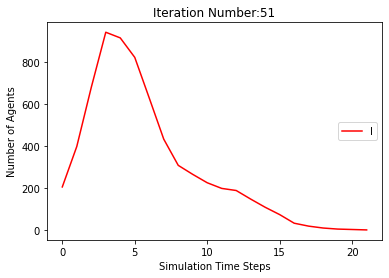

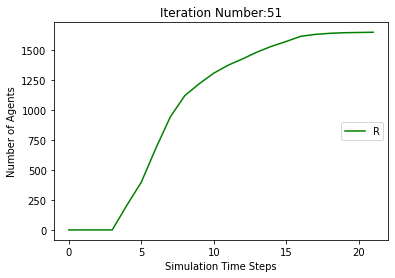

[9795, 9580, 9314, 9058, 8863, 8753, 8671, 8613, 8555, 8513, 8490, 8467, 8454, 8438, 8419, 8415, 8412, 8408, 8405, 8404, 8402, 8401, 8401, 8401, 8401, 8401]
[205, 420, 686, 942, 932, 827, 643, 445, 308, 240, 181, 146, 101, 75, 71, 52, 42, 30, 14, 11, 10, 7, 4, 3, 1, 0]
[0, 0, 0, 0, 205, 420, 686, 942, 1137, 1247, 1329, 1387, 1445, 1487, 1510, 1533, 1546, 1562, 1581, 1585, 1588, 1592, 1595, 1596, 1598, 1599]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8

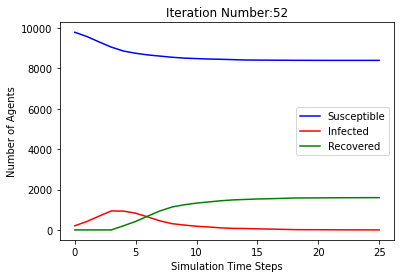

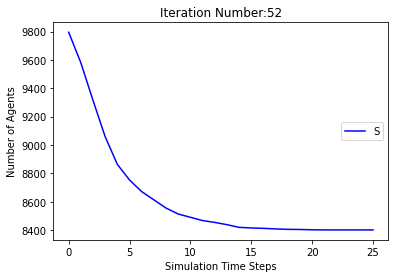

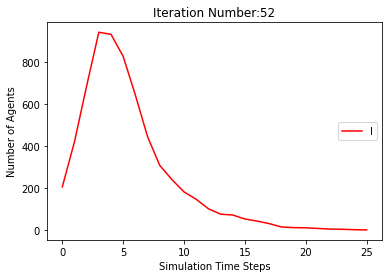

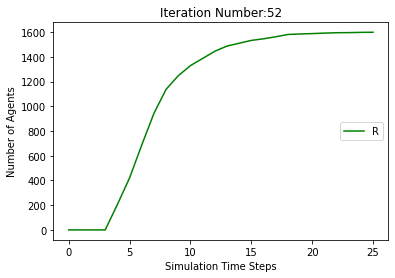

[9795, 9590, 9323, 9060, 8860, 8774, 8702, 8649, 8609, 8586, 8562, 8543, 8527, 8521, 8521, 8521, 8521, 8521]
[205, 410, 677, 940, 935, 816, 621, 411, 251, 188, 140, 106, 82, 65, 41, 22, 6, 0]
[0, 0, 0, 0, 205, 410, 677, 940, 1140, 1226, 1298, 1351, 1391, 1414, 1438, 1457, 1473, 1479]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 8557, 8557, 8555,

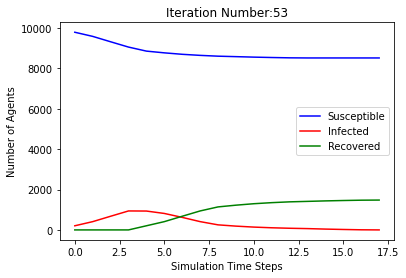

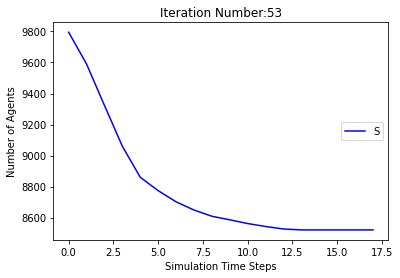

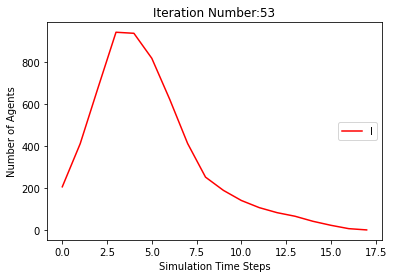

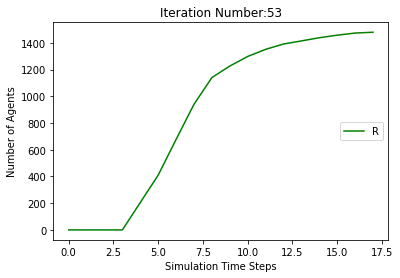

[9795, 9592, 9318, 9039, 8856, 8750, 8656, 8582, 8512, 8459, 8406, 8359, 8334, 8327, 8324, 8319, 8317, 8316, 8315, 8315, 8315, 8315, 8315]
[205, 408, 682, 961, 939, 842, 662, 457, 344, 291, 250, 223, 178, 132, 82, 40, 17, 11, 9, 4, 2, 1, 0]
[0, 0, 0, 0, 205, 408, 682, 961, 1144, 1250, 1344, 1418, 1488, 1541, 1594, 1641, 1666, 1673, 1676, 1681, 1683, 1684, 1685]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301

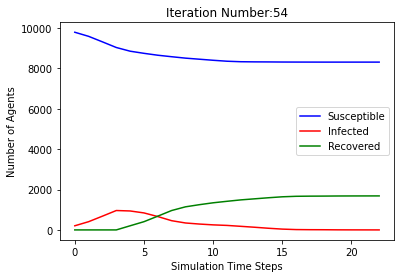

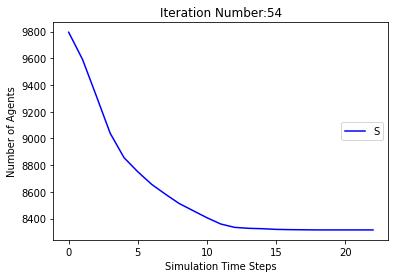

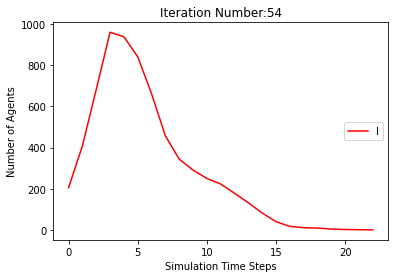

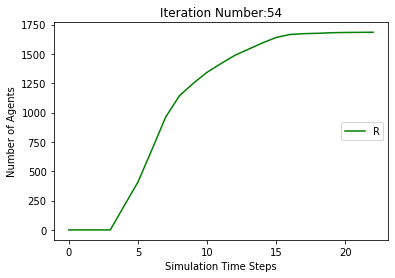

[9795, 9596, 9314, 9047, 8871, 8775, 8702, 8648, 8600, 8559, 8519, 8500, 8480, 8466, 8460, 8459, 8458, 8458, 8454, 8453, 8453, 8452, 8452, 8452, 8452, 8452]
[205, 404, 686, 953, 924, 821, 612, 399, 271, 216, 183, 148, 120, 93, 59, 41, 22, 8, 6, 6, 5, 6, 2, 1, 1, 0]
[0, 0, 0, 0, 205, 404, 686, 953, 1129, 1225, 1298, 1352, 1400, 1441, 1481, 1500, 1520, 1534, 1540, 1541, 1542, 1542, 1546, 1547, 1547, 1548]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462,

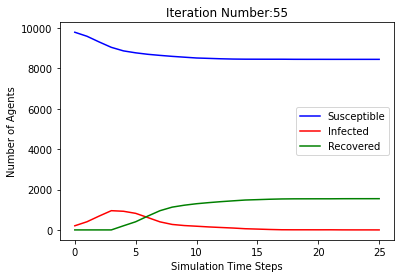

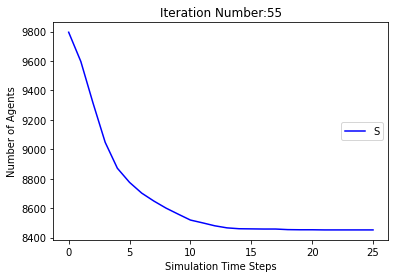

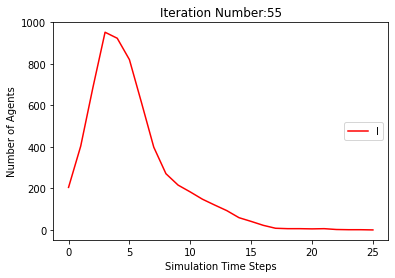

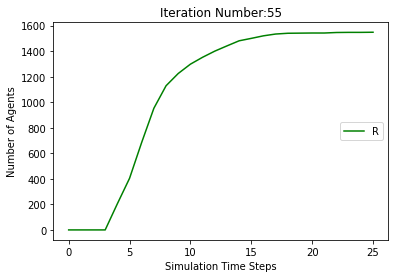

[9795, 9600, 9308, 9032, 8825, 8705, 8602, 8519, 8425, 8354, 8312, 8272, 8253, 8231, 8219, 8211, 8204, 8200, 8200, 8197, 8197, 8197, 8197, 8197]
[205, 400, 692, 968, 970, 895, 706, 513, 400, 351, 290, 247, 172, 123, 93, 61, 49, 31, 19, 14, 7, 3, 3, 0]
[0, 0, 0, 0, 205, 400, 692, 968, 1175, 1295, 1398, 1481, 1575, 1646, 1688, 1728, 1747, 1769, 1781, 1789, 1796, 1800, 1800, 1803]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], 

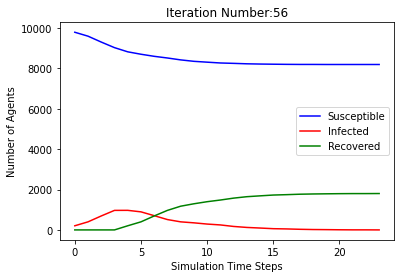

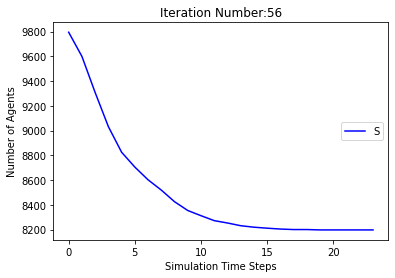

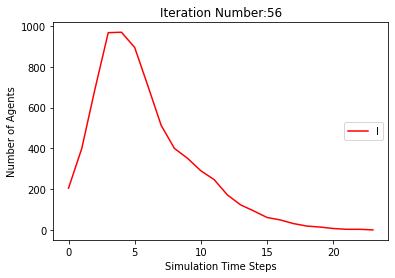

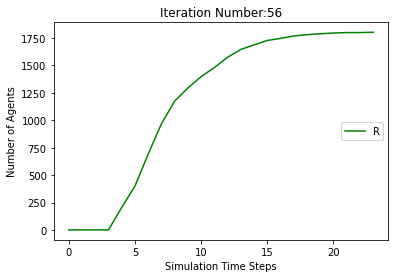

[9795, 9595, 9313, 9042, 8874, 8800, 8749, 8700, 8651, 8609, 8571, 8547, 8525, 8513, 8507, 8506, 8506, 8506, 8506, 8506]
[205, 405, 687, 958, 921, 795, 564, 342, 223, 191, 178, 153, 126, 96, 64, 41, 19, 7, 1, 0]
[0, 0, 0, 0, 205, 405, 687, 958, 1126, 1200, 1251, 1300, 1349, 1391, 1429, 1453, 1475, 1487, 1493, 1494]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 859

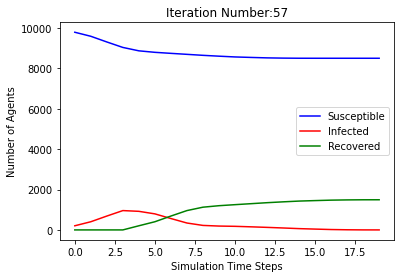

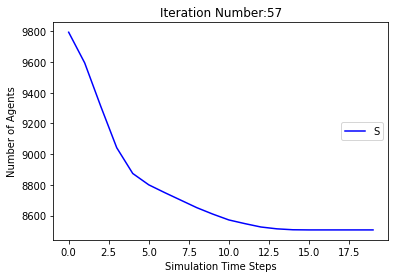

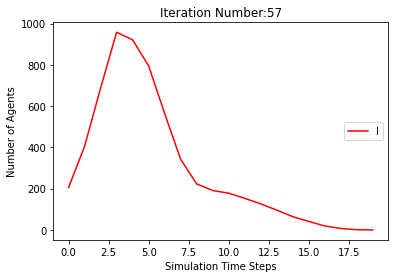

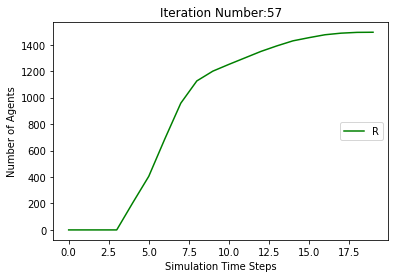

[9795, 9588, 9301, 9041, 8834, 8748, 8695, 8638, 8592, 8543, 8515, 8493, 8476, 8463, 8453, 8446, 8441, 8436, 8431, 8426, 8426, 8426, 8426, 8425, 8425, 8425, 8425, 8424, 8424, 8424, 8424, 8424]
[205, 412, 699, 959, 961, 840, 606, 403, 242, 205, 180, 145, 116, 80, 62, 47, 35, 27, 22, 20, 15, 10, 5, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 205, 412, 699, 959, 1166, 1252, 1305, 1362, 1408, 1457, 1485, 1507, 1524, 1537, 1547, 1554, 1559, 1564, 1569, 1574, 1574, 1574, 1574, 1575, 1575, 1575, 1575, 1576]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 

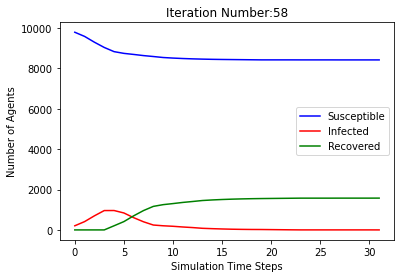

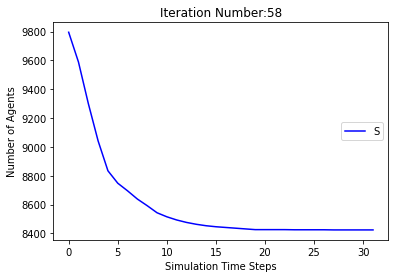

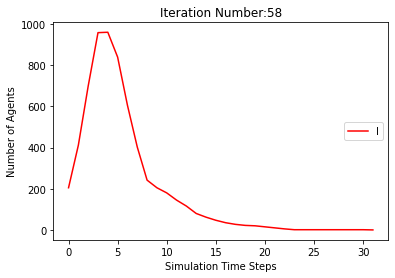

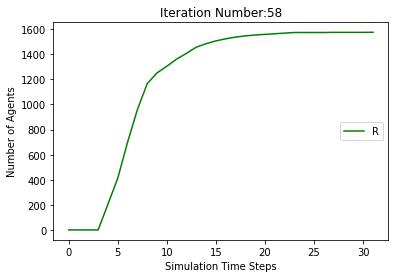

[9795, 9572, 9299, 9056, 8864, 8786, 8733, 8688, 8653, 8628, 8603, 8581, 8563, 8548, 8542, 8536, 8534, 8532, 8530, 8530, 8530, 8530, 8530]
[205, 428, 701, 944, 931, 786, 566, 368, 211, 158, 130, 107, 90, 80, 61, 45, 29, 16, 12, 6, 4, 2, 0]
[0, 0, 0, 0, 205, 428, 701, 944, 1136, 1214, 1267, 1312, 1347, 1372, 1397, 1419, 1437, 1452, 1458, 1464, 1466, 1468, 1470]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301,

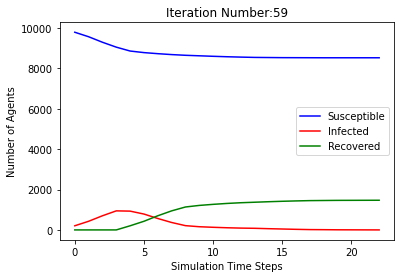

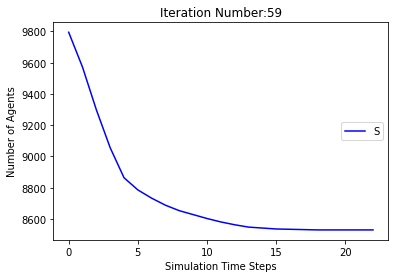

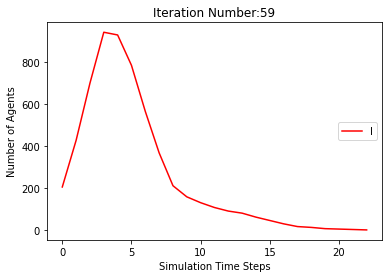

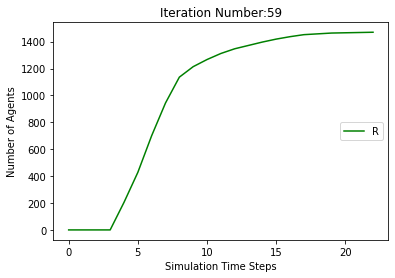

[9795, 9608, 9346, 9092, 8912, 8840, 8781, 8740, 8690, 8663, 8636, 8616, 8594, 8581, 8576, 8574, 8573, 8570, 8569, 8568, 8568, 8568, 8568, 8568]
[205, 392, 654, 908, 883, 768, 565, 352, 222, 177, 145, 124, 96, 82, 60, 42, 21, 11, 7, 6, 5, 2, 1, 0]
[0, 0, 0, 0, 205, 392, 654, 908, 1088, 1160, 1219, 1260, 1310, 1337, 1364, 1384, 1406, 1419, 1424, 1426, 1427, 1430, 1431, 1432]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [979

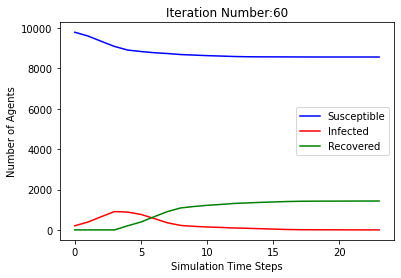

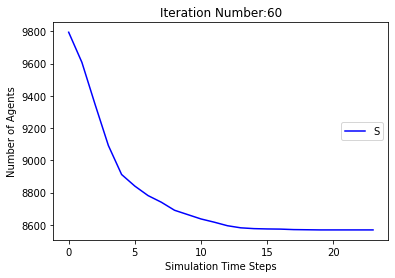

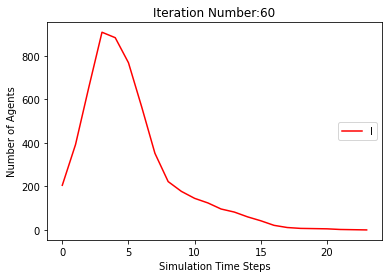

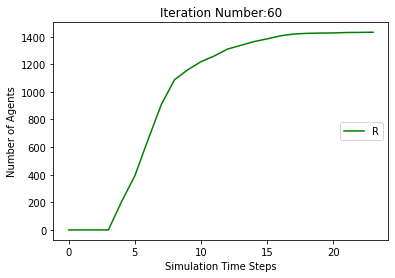

[9795, 9603, 9327, 9049, 8832, 8734, 8653, 8596, 8548, 8510, 8491, 8478, 8470, 8467, 8466, 8464, 8463, 8463, 8463, 8463, 8463]
[205, 397, 673, 951, 963, 869, 674, 453, 284, 224, 162, 118, 78, 43, 25, 14, 7, 4, 3, 1, 0]
[0, 0, 0, 0, 205, 397, 673, 951, 1168, 1266, 1347, 1404, 1452, 1490, 1509, 1522, 1530, 1533, 1534, 1536, 1537]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 86

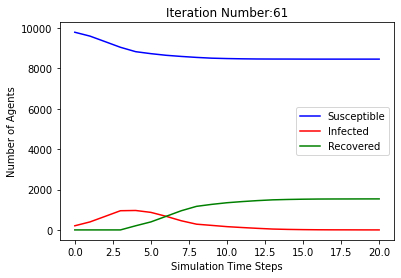

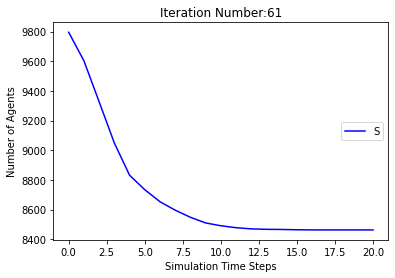

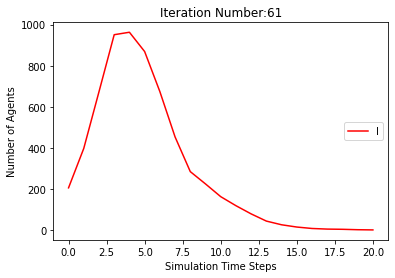

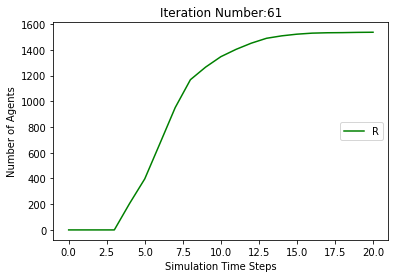

[9795, 9597, 9329, 9049, 8864, 8784, 8745, 8713, 8683, 8654, 8629, 8605, 8590, 8585, 8584, 8584, 8584, 8584, 8584]
[205, 403, 671, 951, 931, 813, 584, 336, 181, 130, 116, 108, 93, 69, 45, 21, 6, 1, 0]
[0, 0, 0, 0, 205, 403, 671, 951, 1136, 1216, 1255, 1287, 1317, 1346, 1371, 1395, 1410, 1415, 1416]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 85

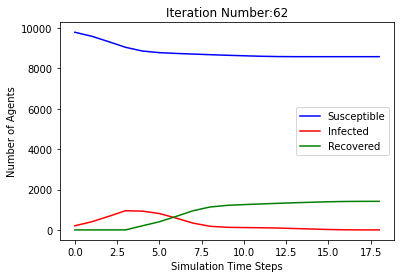

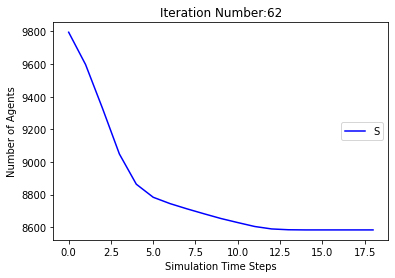

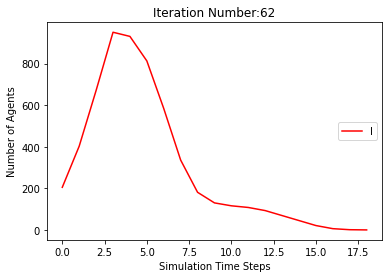

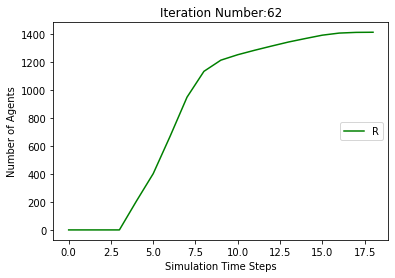

[9795, 9576, 9284, 9022, 8855, 8768, 8709, 8674, 8649, 8630, 8602, 8591, 8582, 8576, 8571, 8568, 8564, 8563, 8561, 8561, 8561, 8561, 8561]
[205, 424, 716, 978, 940, 808, 575, 348, 206, 138, 107, 83, 67, 54, 31, 23, 18, 13, 10, 7, 3, 2, 0]
[0, 0, 0, 0, 205, 424, 716, 978, 1145, 1232, 1291, 1326, 1351, 1370, 1398, 1409, 1418, 1424, 1429, 1432, 1436, 1437, 1439]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 

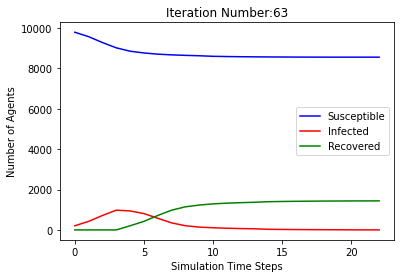

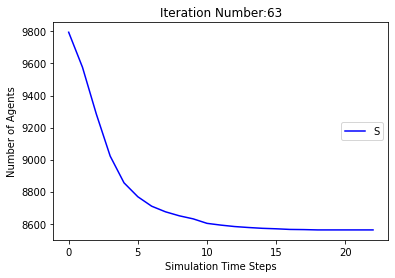

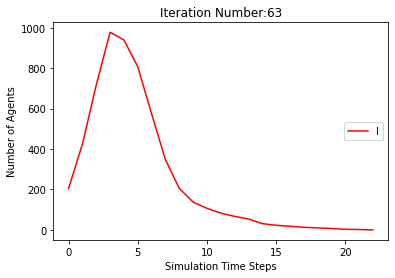

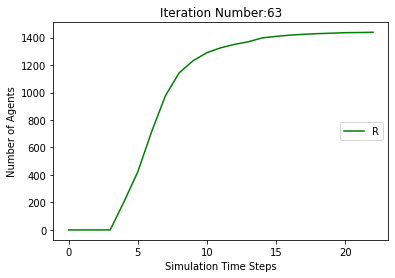

[9795, 9598, 9355, 9094, 8902, 8803, 8739, 8696, 8664, 8641, 8626, 8615, 8604, 8596, 8593, 8593, 8593, 8593, 8593]
[205, 402, 645, 906, 893, 795, 616, 398, 238, 162, 113, 81, 60, 45, 33, 22, 11, 3, 0]
[0, 0, 0, 0, 205, 402, 645, 906, 1098, 1197, 1261, 1304, 1336, 1359, 1374, 1385, 1396, 1404, 1407]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 85

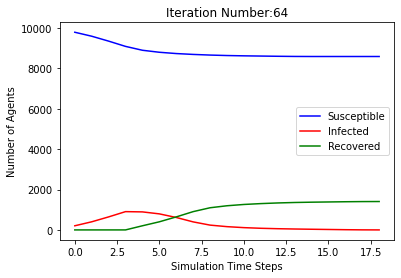

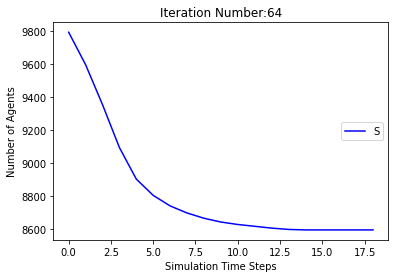

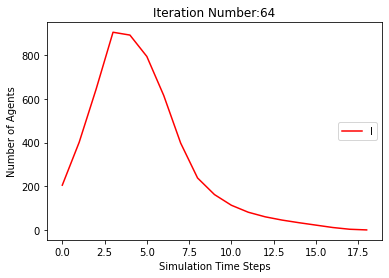

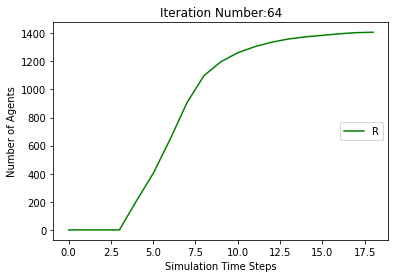

[9795, 9596, 9348, 9090, 8874, 8785, 8717, 8660, 8617, 8595, 8565, 8538, 8517, 8506, 8498, 8494, 8489, 8487, 8487, 8484, 8483, 8483, 8483, 8483, 8483]
[205, 404, 652, 910, 921, 811, 631, 430, 257, 190, 152, 122, 100, 89, 67, 44, 28, 19, 11, 10, 6, 4, 4, 1, 0]
[0, 0, 0, 0, 205, 404, 652, 910, 1126, 1215, 1283, 1340, 1383, 1405, 1435, 1462, 1483, 1494, 1502, 1506, 1511, 1513, 1513, 1516, 1517]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462,

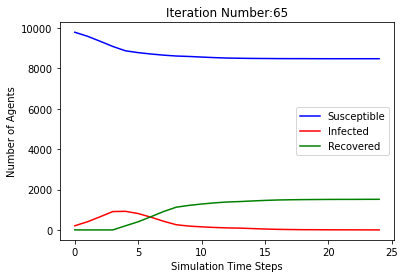

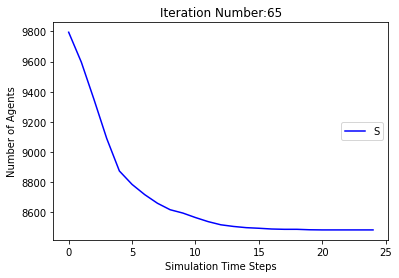

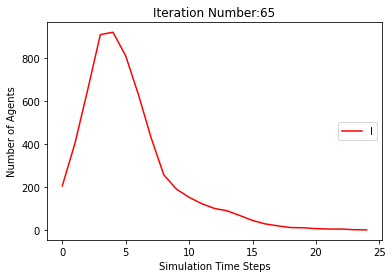

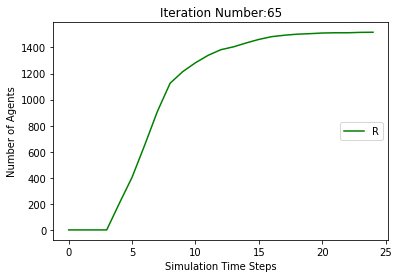

[9795, 9594, 9325, 9045, 8864, 8755, 8669, 8608, 8550, 8510, 8475, 8437, 8412, 8383, 8358, 8349, 8341, 8335, 8326, 8320, 8318, 8314, 8310, 8308, 8306, 8303, 8303, 8303, 8303, 8302, 8302, 8302, 8302, 8302]
[205, 406, 675, 955, 931, 839, 656, 437, 314, 245, 194, 171, 138, 127, 117, 88, 71, 48, 32, 29, 23, 21, 16, 12, 12, 11, 7, 5, 3, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 205, 406, 675, 955, 1136, 1245, 1331, 1392, 1450, 1490, 1525, 1563, 1588, 1617, 1642, 1651, 1659, 1665, 1674, 1680, 1682, 1686, 1690, 1692, 1694, 1697, 1697, 1697, 1697, 1698]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [

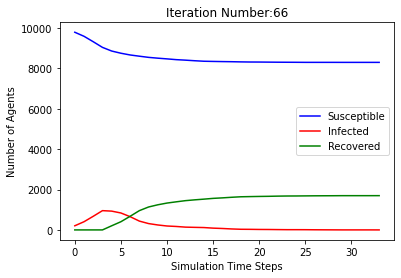

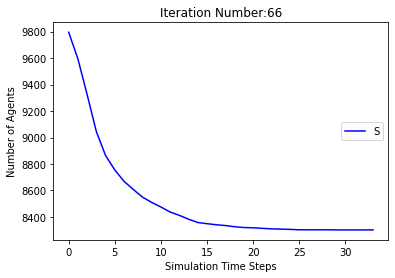

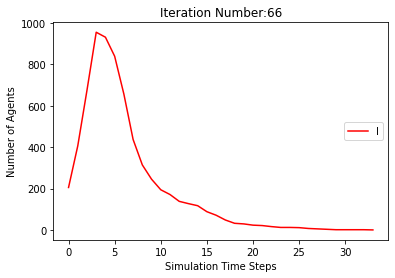

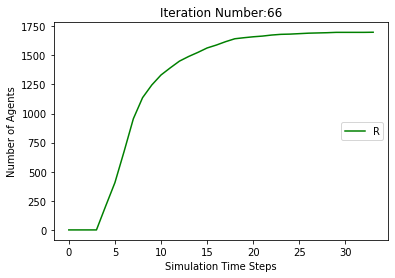

[9795, 9584, 9304, 9062, 8885, 8779, 8718, 8670, 8637, 8610, 8586, 8567, 8558, 8550, 8535, 8527, 8524, 8522, 8522, 8522, 8522, 8522]
[205, 416, 696, 938, 910, 805, 586, 392, 248, 169, 132, 103, 79, 60, 51, 40, 34, 28, 13, 5, 2, 0]
[0, 0, 0, 0, 205, 416, 696, 938, 1115, 1221, 1282, 1330, 1363, 1390, 1414, 1433, 1442, 1450, 1465, 1473, 1476, 1478]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 87

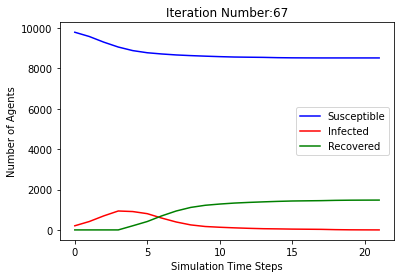

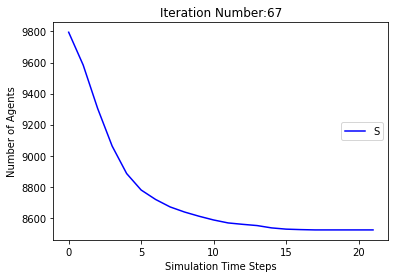

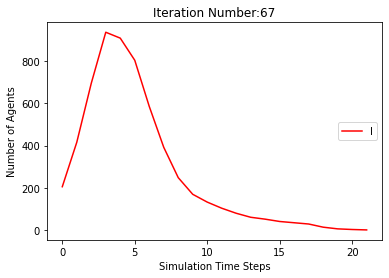

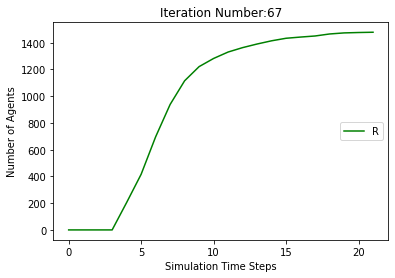

[9795, 9594, 9329, 9063, 8882, 8802, 8749, 8704, 8646, 8597, 8548, 8507, 8471, 8438, 8407, 8381, 8367, 8357, 8354, 8353, 8352, 8352, 8352, 8352, 8352]
[205, 406, 671, 937, 913, 792, 580, 359, 236, 205, 201, 197, 175, 159, 141, 126, 104, 81, 53, 28, 15, 5, 2, 1, 0]
[0, 0, 0, 0, 205, 406, 671, 937, 1118, 1198, 1251, 1296, 1354, 1403, 1452, 1493, 1529, 1562, 1593, 1619, 1633, 1643, 1646, 1647, 1648]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 

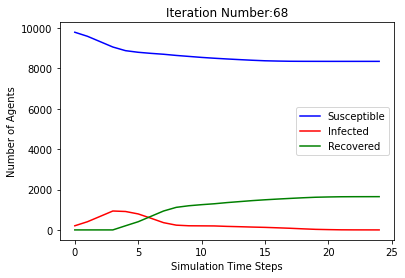

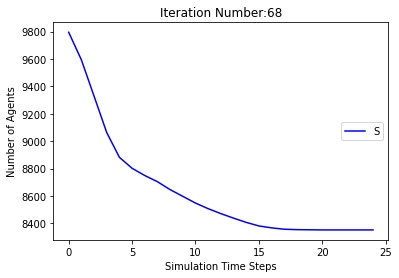

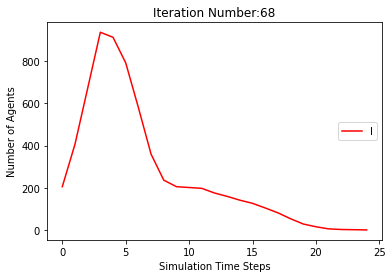

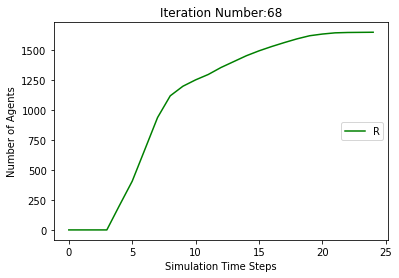

[9795, 9603, 9307, 9041, 8879, 8793, 8742, 8708, 8670, 8631, 8601, 8571, 8554, 8536, 8526, 8520, 8519, 8519, 8519, 8519, 8519]
[205, 397, 693, 959, 916, 810, 565, 333, 209, 162, 141, 137, 116, 95, 75, 51, 35, 17, 7, 1, 0]
[0, 0, 0, 0, 205, 397, 693, 959, 1121, 1207, 1258, 1292, 1330, 1369, 1399, 1429, 1446, 1464, 1474, 1480, 1481]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669,

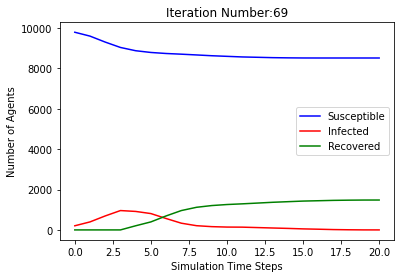

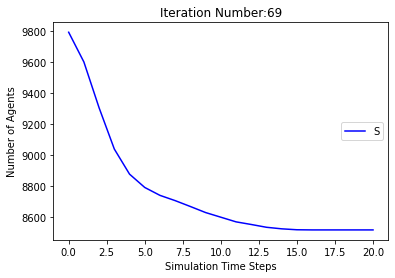

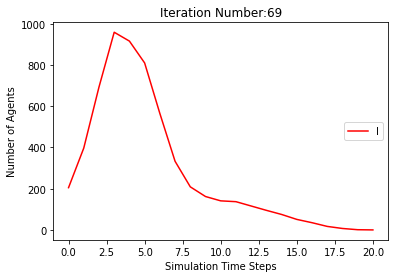

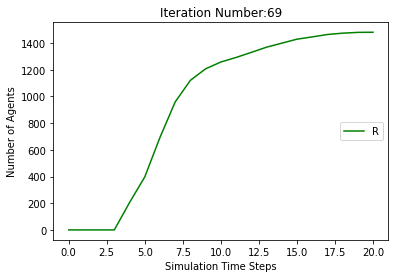

[9795, 9593, 9312, 9057, 8887, 8797, 8740, 8704, 8668, 8647, 8633, 8627, 8623, 8620, 8616, 8615, 8614, 8614, 8614, 8614, 8614]
[205, 407, 688, 943, 908, 796, 572, 353, 219, 150, 107, 77, 45, 27, 17, 12, 9, 6, 2, 1, 0]
[0, 0, 0, 0, 205, 407, 688, 943, 1113, 1203, 1260, 1296, 1332, 1353, 1367, 1373, 1377, 1380, 1384, 1385, 1386]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 863

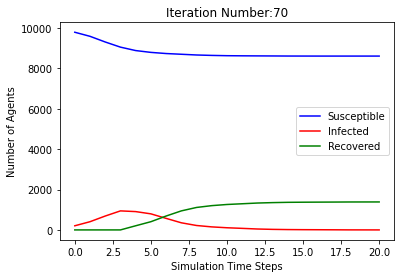

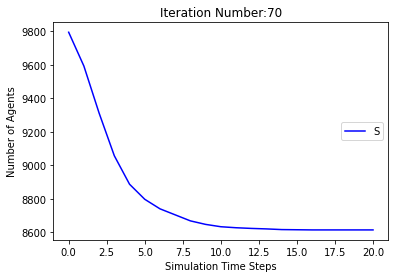

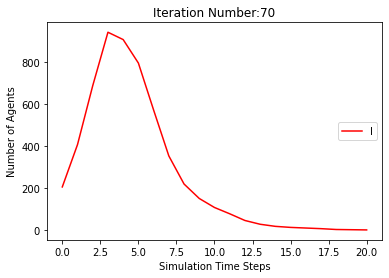

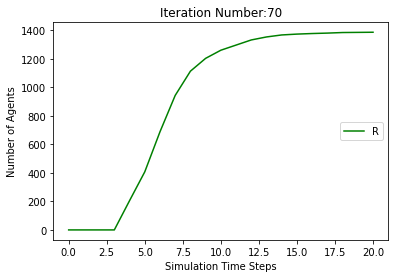

[9795, 9599, 9319, 9070, 8848, 8732, 8623, 8544, 8479, 8434, 8385, 8354, 8324, 8300, 8286, 8276, 8275, 8275, 8275, 8275, 8275]
[205, 401, 681, 930, 947, 867, 696, 526, 369, 298, 238, 190, 155, 134, 99, 78, 49, 25, 11, 1, 0]
[0, 0, 0, 0, 205, 401, 681, 930, 1152, 1268, 1377, 1456, 1521, 1566, 1615, 1646, 1676, 1700, 1714, 1724, 1725]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 866

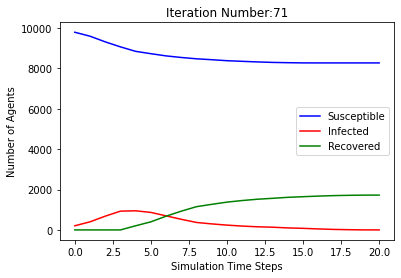

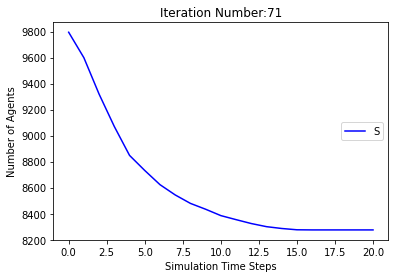

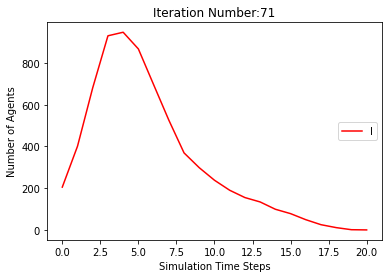

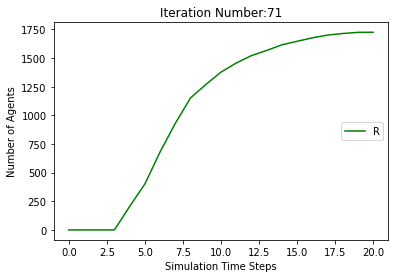

[9795, 9571, 9317, 9061, 8872, 8783, 8722, 8690, 8672, 8649, 8631, 8607, 8587, 8576, 8574, 8573, 8573, 8573, 8573, 8573]
[205, 429, 683, 939, 923, 788, 595, 371, 200, 134, 91, 83, 85, 73, 57, 34, 14, 3, 1, 0]
[0, 0, 0, 0, 205, 429, 683, 939, 1128, 1217, 1278, 1310, 1328, 1351, 1369, 1393, 1413, 1424, 1426, 1427]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 

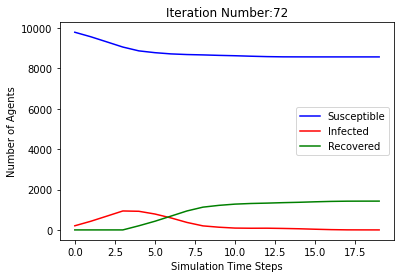

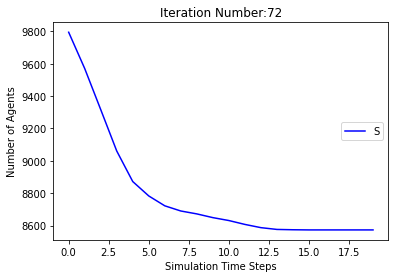

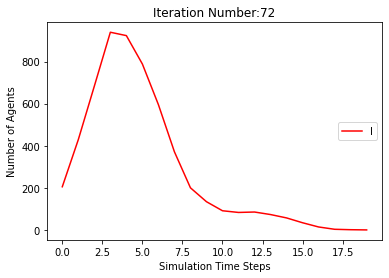

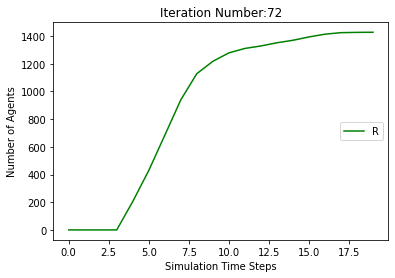

[9795, 9594, 9327, 9069, 8886, 8777, 8707, 8651, 8617, 8584, 8566, 8556, 8547, 8544, 8539, 8539, 8538, 8538, 8538, 8538, 8538]
[205, 406, 673, 931, 909, 817, 620, 418, 269, 193, 141, 95, 70, 40, 27, 17, 9, 6, 1, 1, 0]
[0, 0, 0, 0, 205, 406, 673, 931, 1114, 1223, 1293, 1349, 1383, 1416, 1434, 1444, 1453, 1456, 1461, 1461, 1462]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 863

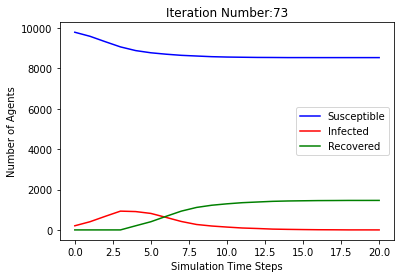

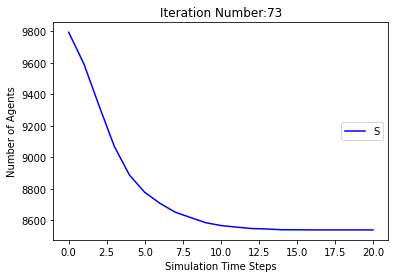

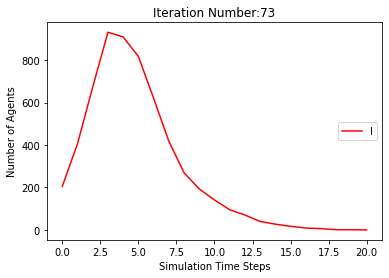

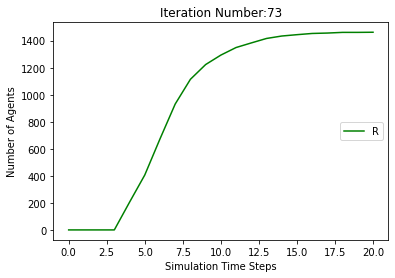

[9795, 9593, 9322, 9044, 8851, 8773, 8719, 8690, 8657, 8630, 8611, 8599, 8597, 8594, 8592, 8591, 8591, 8591, 8591, 8591]
[205, 407, 678, 956, 944, 820, 603, 354, 194, 143, 108, 91, 60, 36, 19, 8, 6, 3, 1, 0]
[0, 0, 0, 0, 205, 407, 678, 956, 1149, 1227, 1281, 1310, 1343, 1370, 1389, 1401, 1403, 1406, 1408, 1409]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8

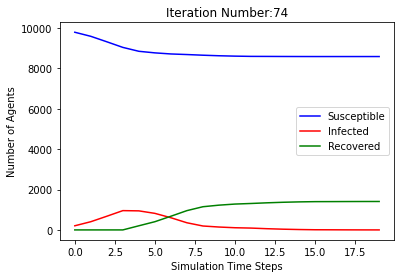

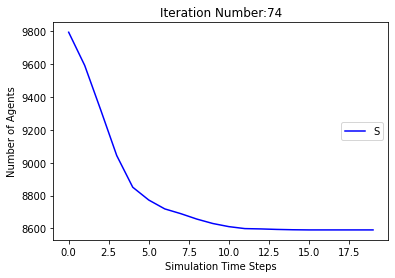

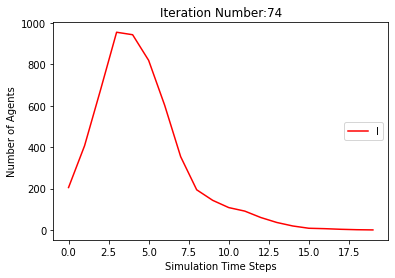

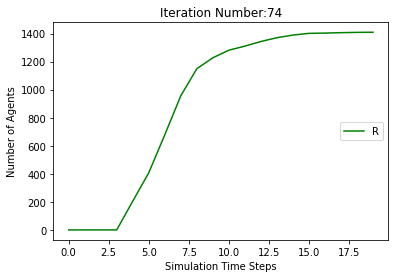

[9795, 9611, 9361, 9128, 8923, 8852, 8792, 8747, 8720, 8703, 8680, 8663, 8650, 8646, 8644, 8642, 8642, 8641, 8641, 8641, 8641, 8641]
[205, 389, 639, 872, 872, 759, 569, 381, 203, 149, 112, 84, 70, 57, 36, 21, 8, 5, 3, 1, 1, 0]
[0, 0, 0, 0, 205, 389, 639, 872, 1077, 1148, 1208, 1253, 1280, 1297, 1320, 1337, 1350, 1354, 1356, 1358, 1358, 1359]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 

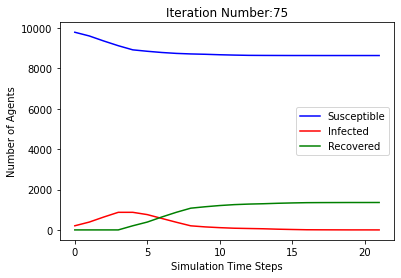

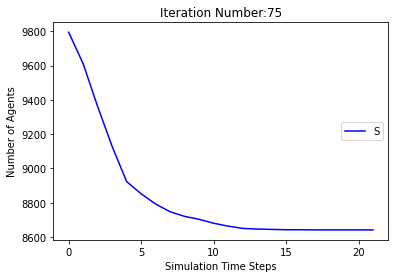

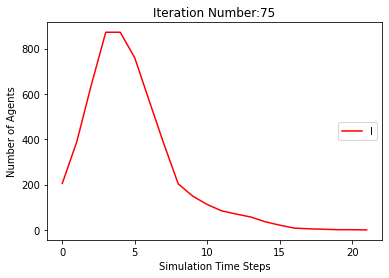

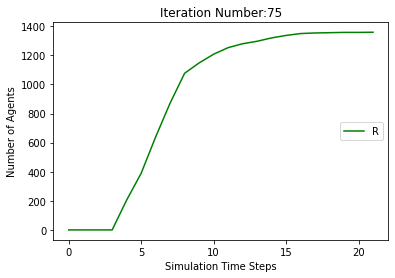

[9795, 9581, 9309, 9035, 8862, 8770, 8689, 8615, 8554, 8493, 8457, 8429, 8405, 8386, 8375, 8362, 8355, 8344, 8340, 8338, 8335, 8333, 8333, 8333, 8331, 8328, 8327, 8324, 8322, 8321, 8321, 8321, 8321, 8321]
[205, 419, 691, 965, 933, 811, 620, 420, 308, 277, 232, 186, 149, 107, 82, 67, 50, 42, 35, 24, 20, 11, 7, 5, 4, 5, 6, 9, 9, 7, 6, 3, 1, 0]
[0, 0, 0, 0, 205, 419, 691, 965, 1138, 1230, 1311, 1385, 1446, 1507, 1543, 1571, 1595, 1614, 1625, 1638, 1645, 1656, 1660, 1662, 1665, 1667, 1667, 1667, 1669, 1672, 1673, 1676, 1678, 1679]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795,

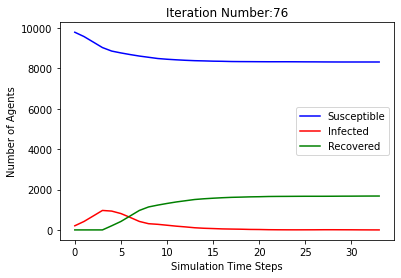

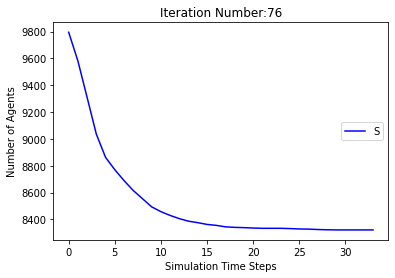

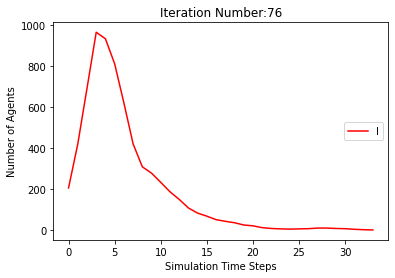

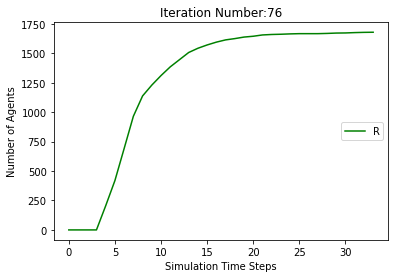

[9795, 9601, 9349, 9078, 8852, 8719, 8589, 8494, 8434, 8395, 8361, 8350, 8341, 8336, 8332, 8331, 8331, 8331, 8331, 8331]
[205, 399, 651, 922, 943, 882, 760, 584, 418, 324, 228, 144, 93, 59, 29, 19, 10, 5, 1, 0]
[0, 0, 0, 0, 205, 399, 651, 922, 1148, 1281, 1411, 1506, 1566, 1605, 1639, 1650, 1659, 1664, 1668, 1669]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593

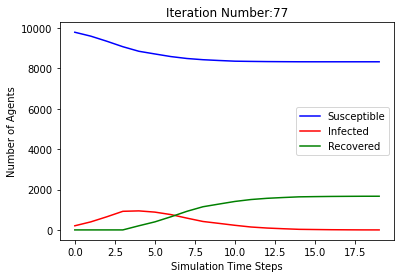

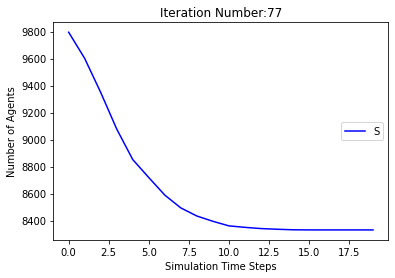

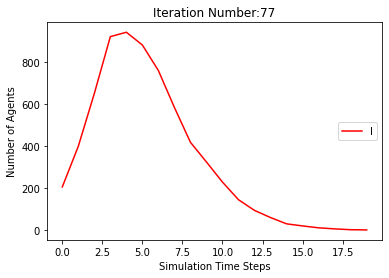

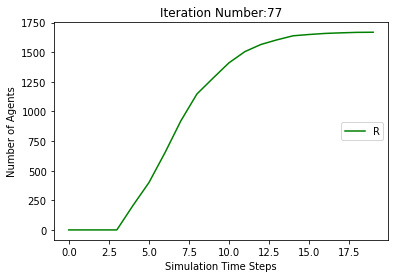

[9795, 9610, 9341, 9070, 8875, 8776, 8706, 8652, 8593, 8548, 8520, 8494, 8472, 8454, 8439, 8426, 8421, 8418, 8418, 8418, 8418, 8418]
[205, 390, 659, 930, 920, 834, 635, 418, 282, 228, 186, 158, 121, 94, 81, 68, 51, 36, 21, 8, 3, 0]
[0, 0, 0, 0, 205, 390, 659, 930, 1125, 1224, 1294, 1348, 1407, 1452, 1480, 1506, 1528, 1546, 1561, 1574, 1579, 1582]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8

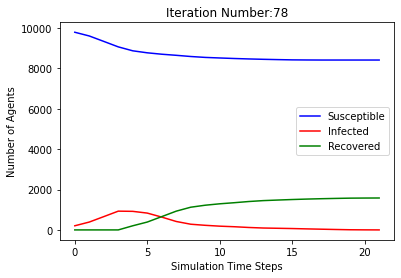

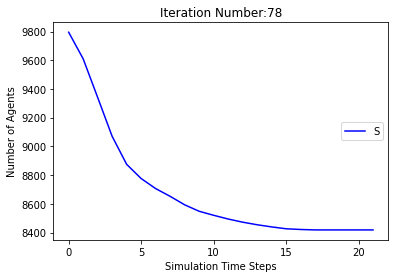

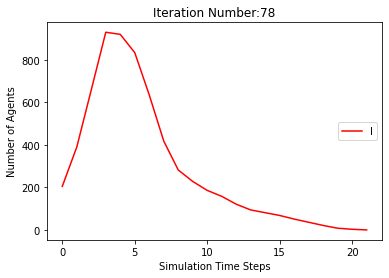

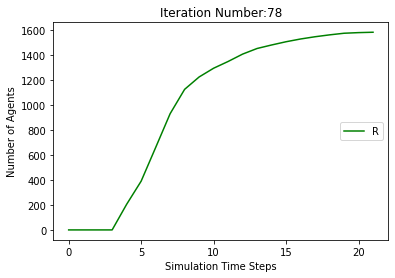

[9795, 9595, 9310, 9065, 8880, 8792, 8715, 8659, 8599, 8557, 8518, 8486, 8469, 8451, 8440, 8432, 8429, 8424, 8419, 8414, 8412, 8412, 8412, 8412, 8412]
[205, 405, 690, 935, 915, 803, 595, 406, 281, 235, 197, 173, 130, 106, 78, 54, 40, 27, 21, 18, 17, 12, 7, 2, 0]
[0, 0, 0, 0, 205, 405, 690, 935, 1120, 1208, 1285, 1341, 1401, 1443, 1482, 1514, 1531, 1549, 1560, 1568, 1571, 1576, 1581, 1586, 1588]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 84

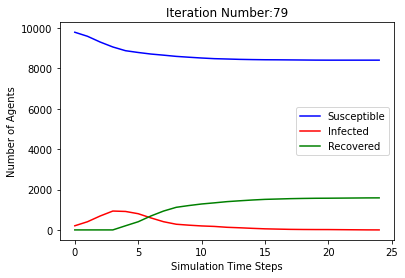

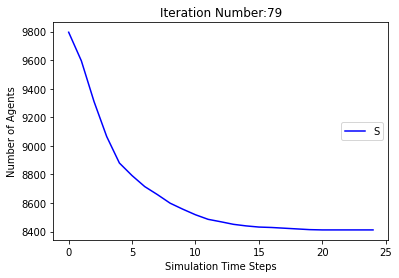

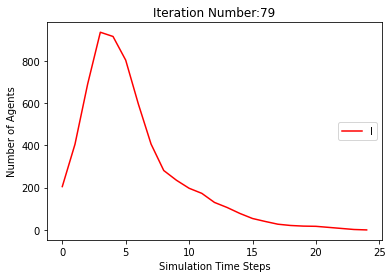

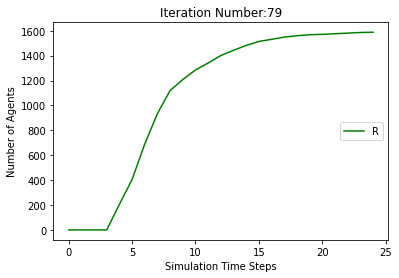

[9795, 9581, 9308, 9039, 8849, 8754, 8680, 8628, 8589, 8565, 8531, 8506, 8484, 8471, 8465, 8464, 8463, 8463, 8463, 8463, 8463]
[205, 419, 692, 961, 946, 827, 628, 411, 260, 189, 149, 122, 105, 94, 66, 42, 21, 8, 2, 1, 0]
[0, 0, 0, 0, 205, 419, 692, 961, 1151, 1246, 1320, 1372, 1411, 1435, 1469, 1494, 1516, 1529, 1535, 1536, 1537]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 

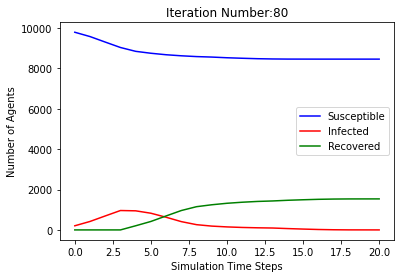

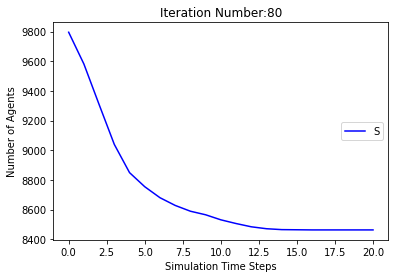

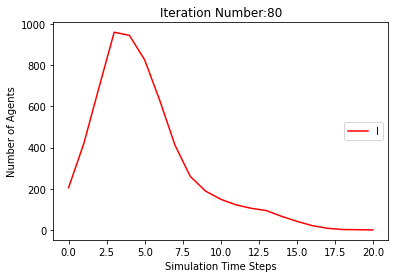

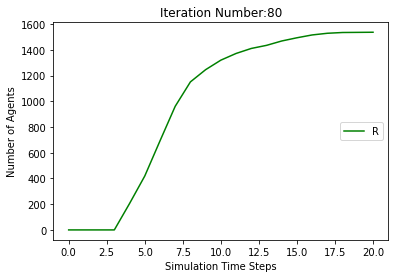

[9795, 9598, 9338, 9092, 8904, 8799, 8740, 8696, 8672, 8646, 8628, 8615, 8601, 8582, 8563, 8539, 8527, 8516, 8507, 8492, 8488, 8487, 8486, 8486, 8486, 8486, 8486]
[205, 402, 662, 908, 891, 799, 598, 396, 232, 153, 112, 81, 71, 64, 65, 76, 74, 66, 56, 47, 39, 29, 21, 6, 2, 1, 0]
[0, 0, 0, 0, 205, 402, 662, 908, 1096, 1201, 1260, 1304, 1328, 1354, 1372, 1385, 1399, 1418, 1437, 1461, 1473, 1484, 1493, 1508, 1512, 1513, 1514]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469

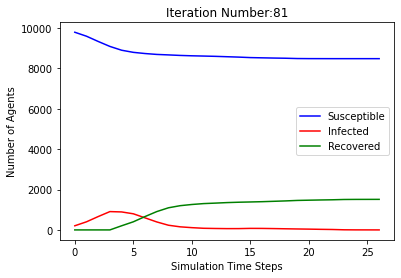

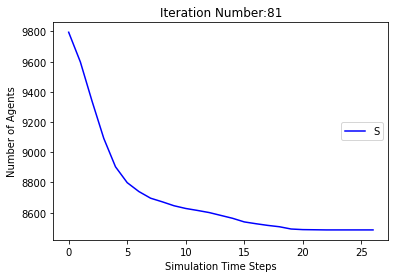

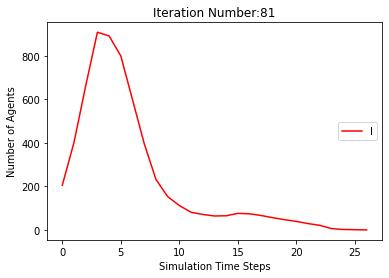

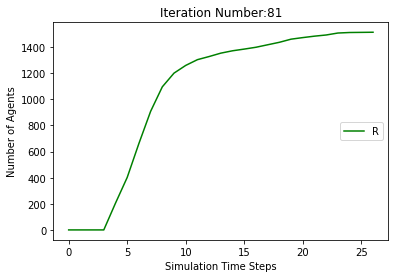

[9795, 9580, 9300, 9024, 8830, 8739, 8665, 8575, 8497, 8431, 8373, 8322, 8281, 8251, 8215, 8182, 8157, 8139, 8118, 8110, 8101, 8095, 8089, 8089, 8087, 8087, 8086, 8086, 8086, 8086, 8086]
[205, 420, 700, 976, 965, 841, 635, 449, 333, 308, 292, 253, 216, 180, 158, 140, 124, 112, 97, 72, 56, 44, 29, 21, 14, 8, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 205, 420, 700, 976, 1170, 1261, 1335, 1425, 1503, 1569, 1627, 1678, 1719, 1749, 1785, 1818, 1843, 1861, 1882, 1890, 1899, 1905, 1911, 1911, 1913, 1913, 1914]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8

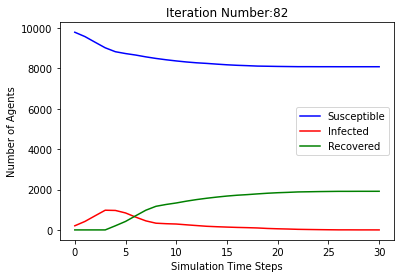

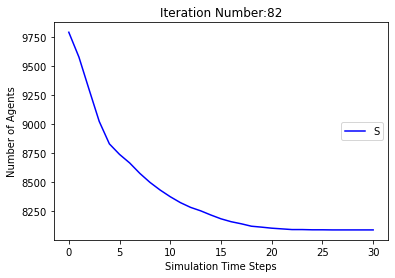

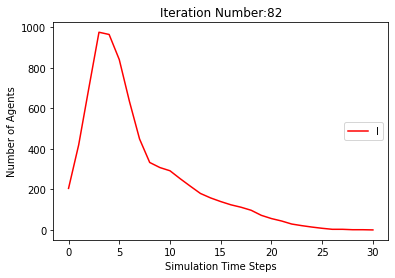

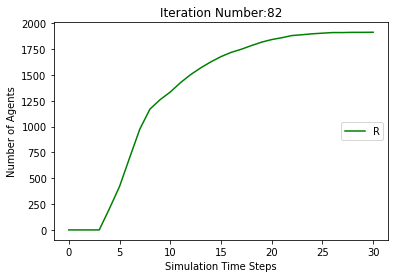

[9795, 9587, 9311, 9057, 8875, 8790, 8709, 8639, 8584, 8517, 8471, 8438, 8405, 8385, 8370, 8364, 8360, 8358, 8356, 8354, 8350, 8346, 8342, 8340, 8339, 8339, 8339, 8339, 8339]
[205, 413, 689, 943, 920, 797, 602, 418, 291, 273, 238, 201, 179, 132, 101, 74, 45, 27, 14, 10, 10, 12, 14, 14, 11, 7, 3, 1, 0]
[0, 0, 0, 0, 205, 413, 689, 943, 1125, 1210, 1291, 1361, 1416, 1483, 1529, 1562, 1595, 1615, 1630, 1636, 1640, 1642, 1644, 1646, 1650, 1654, 1658, 1660, 1661]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542

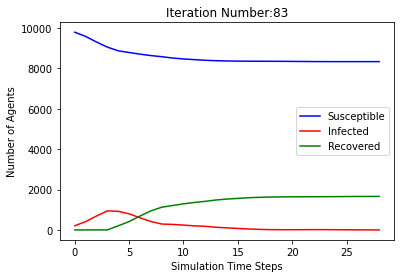

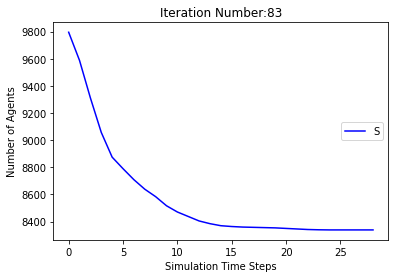

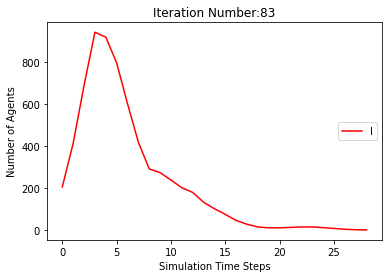

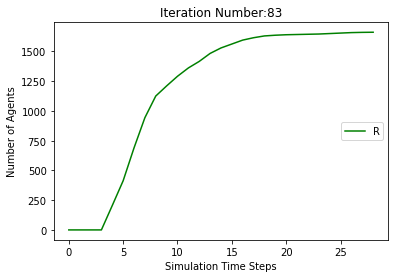

[9795, 9569, 9266, 8991, 8815, 8708, 8634, 8564, 8506, 8469, 8442, 8427, 8409, 8400, 8384, 8376, 8371, 8369, 8368, 8368, 8367, 8367, 8367, 8367, 8367]
[205, 431, 734, 1009, 980, 861, 632, 427, 309, 239, 192, 137, 97, 69, 58, 51, 38, 31, 16, 8, 4, 2, 1, 1, 0]
[0, 0, 0, 0, 205, 431, 734, 1009, 1185, 1292, 1366, 1436, 1494, 1531, 1558, 1573, 1591, 1600, 1616, 1624, 1629, 1631, 1632, 1632, 1633]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462,

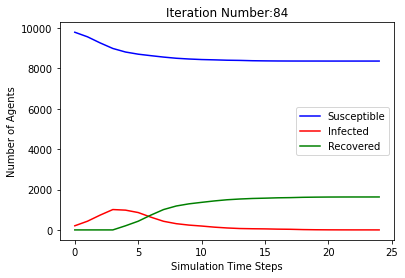

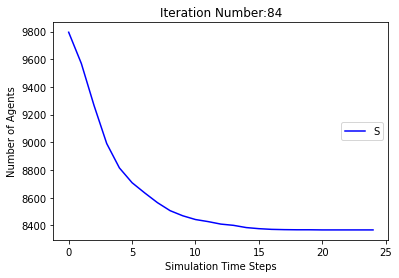

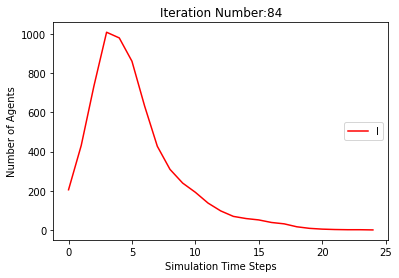

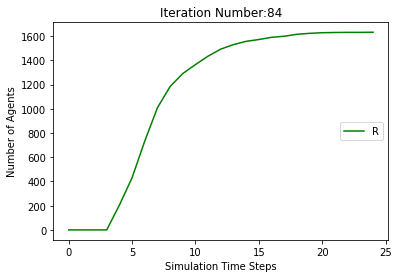

[9795, 9597, 9321, 9047, 8878, 8805, 8745, 8702, 8681, 8656, 8640, 8623, 8602, 8593, 8588, 8585, 8585, 8585, 8585, 8585]
[205, 403, 679, 953, 917, 792, 576, 345, 197, 149, 105, 79, 79, 63, 52, 38, 17, 8, 3, 0]
[0, 0, 0, 0, 205, 403, 679, 953, 1122, 1195, 1255, 1298, 1319, 1344, 1360, 1377, 1398, 1407, 1412, 1415]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593,

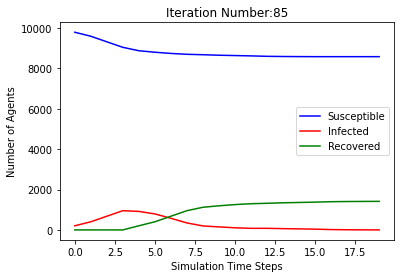

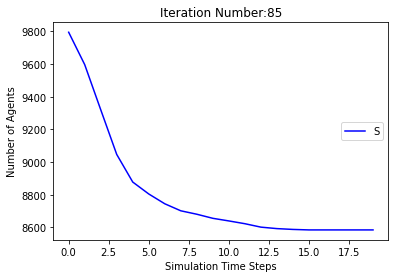

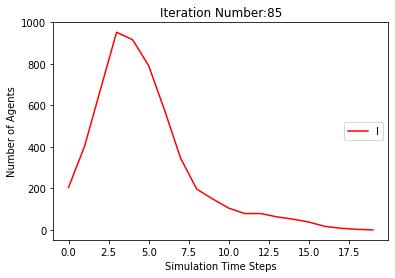

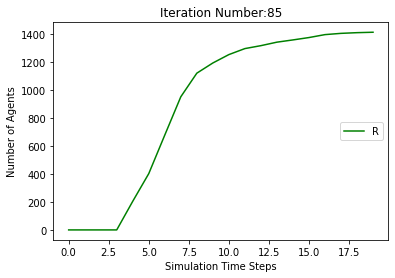

[9795, 9629, 9357, 9103, 8902, 8808, 8748, 8681, 8649, 8613, 8589, 8573, 8566, 8557, 8551, 8549, 8546, 8545, 8544, 8544, 8544, 8544, 8544]
[205, 371, 643, 897, 893, 821, 609, 422, 253, 195, 159, 108, 83, 56, 38, 24, 20, 12, 7, 5, 2, 1, 0]
[0, 0, 0, 0, 205, 371, 643, 897, 1098, 1192, 1252, 1319, 1351, 1387, 1411, 1427, 1434, 1443, 1449, 1451, 1454, 1455, 1456]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 

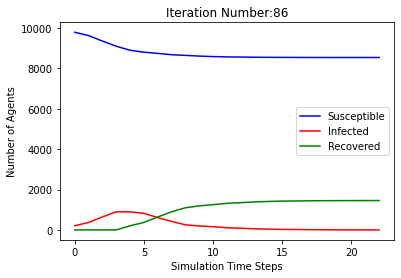

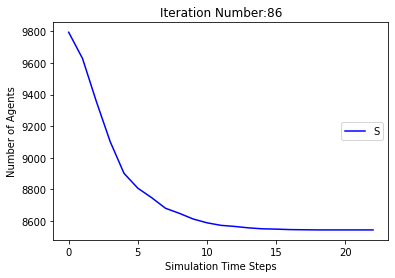

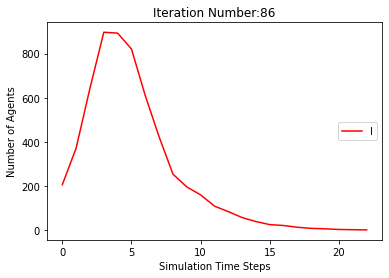

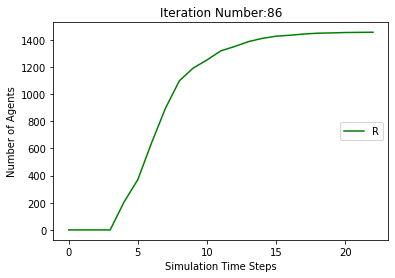

[9795, 9593, 9322, 9075, 8890, 8791, 8726, 8682, 8637, 8605, 8576, 8559, 8549, 8547, 8543, 8539, 8537, 8537, 8537, 8537, 8537]
[205, 407, 678, 925, 905, 802, 596, 393, 253, 186, 150, 123, 88, 58, 33, 20, 12, 10, 6, 2, 0]
[0, 0, 0, 0, 205, 407, 678, 925, 1110, 1209, 1274, 1318, 1363, 1395, 1424, 1441, 1451, 1453, 1457, 1461, 1463]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 

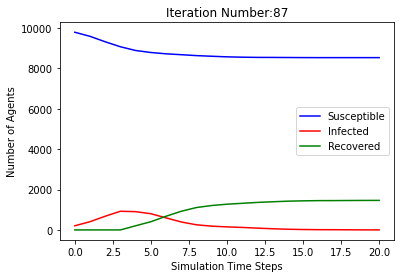

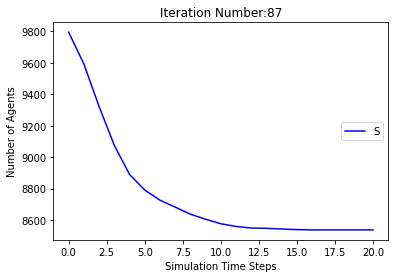

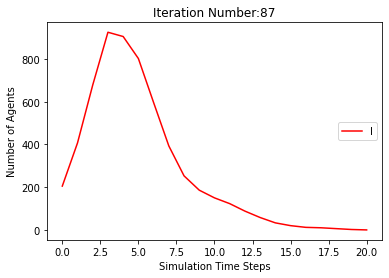

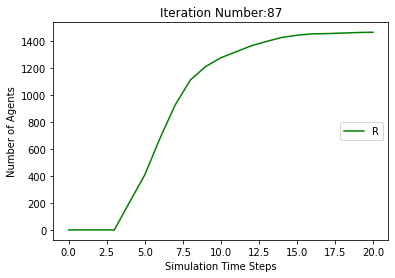

[9795, 9585, 9313, 9042, 8884, 8787, 8720, 8669, 8626, 8589, 8555, 8527, 8510, 8506, 8501, 8497, 8495, 8492, 8491, 8491, 8491, 8491, 8491]
[205, 415, 687, 958, 911, 798, 593, 373, 258, 198, 165, 142, 116, 83, 54, 30, 15, 14, 10, 6, 4, 1, 0]
[0, 0, 0, 0, 205, 415, 687, 958, 1116, 1213, 1280, 1331, 1374, 1411, 1445, 1473, 1490, 1494, 1499, 1503, 1505, 1508, 1509]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301

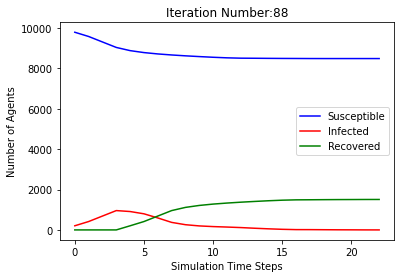

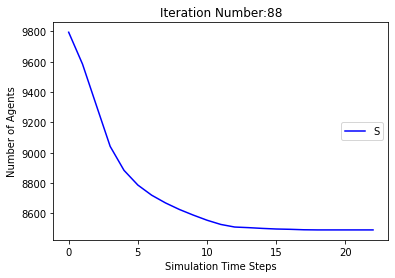

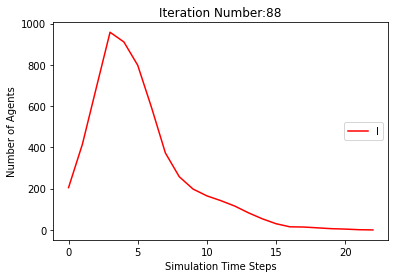

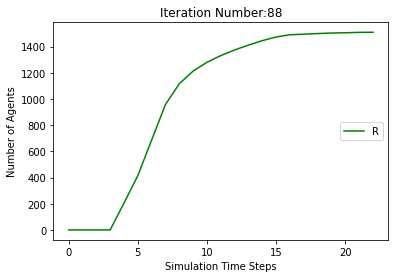

[9795, 9588, 9339, 9081, 8882, 8807, 8726, 8659, 8616, 8582, 8549, 8534, 8521, 8510, 8503, 8497, 8494, 8491, 8486, 8482, 8478, 8474, 8474, 8470, 8468, 8467, 8466, 8466, 8466, 8466, 8466]
[205, 412, 661, 919, 913, 781, 613, 422, 266, 225, 177, 125, 95, 72, 46, 37, 27, 19, 17, 15, 16, 17, 12, 12, 10, 7, 8, 4, 2, 1, 0]
[0, 0, 0, 0, 205, 412, 661, 919, 1118, 1193, 1274, 1341, 1384, 1418, 1451, 1466, 1479, 1490, 1497, 1503, 1506, 1509, 1514, 1518, 1522, 1526, 1526, 1530, 1532, 1533, 1534]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8

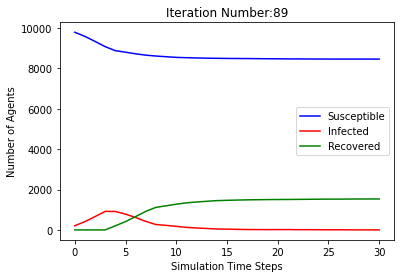

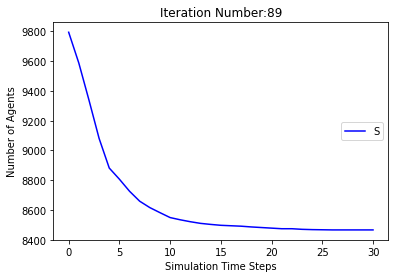

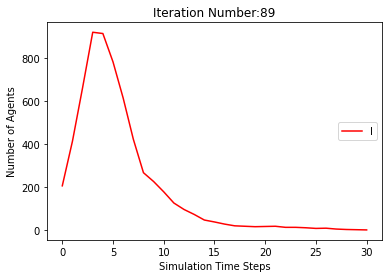

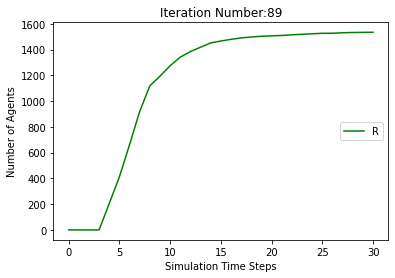

[9795, 9598, 9347, 9080, 8896, 8816, 8751, 8710, 8678, 8649, 8614, 8587, 8569, 8544, 8519, 8501, 8493, 8489, 8489, 8489, 8489, 8489]
[205, 402, 653, 920, 899, 782, 596, 370, 218, 167, 137, 123, 109, 105, 95, 86, 76, 55, 30, 12, 4, 0]
[0, 0, 0, 0, 205, 402, 653, 920, 1104, 1184, 1249, 1290, 1322, 1351, 1386, 1413, 1431, 1456, 1481, 1499, 1507, 1511]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849,

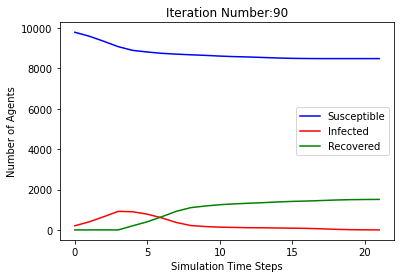

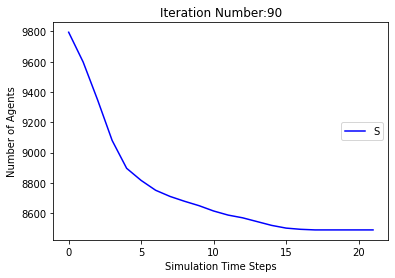

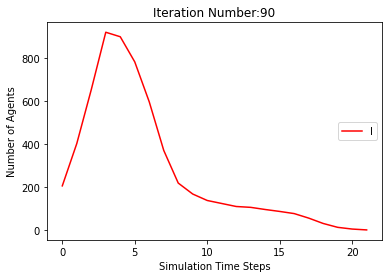

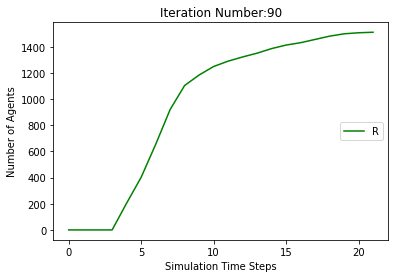

[9795, 9583, 9295, 9038, 8879, 8811, 8761, 8722, 8696, 8668, 8648, 8633, 8618, 8605, 8594, 8588, 8584, 8584, 8584, 8584, 8584]
[205, 417, 705, 962, 916, 772, 534, 316, 183, 143, 113, 89, 78, 63, 54, 45, 34, 21, 10, 4, 0]
[0, 0, 0, 0, 205, 417, 705, 962, 1121, 1189, 1239, 1278, 1304, 1332, 1352, 1367, 1382, 1395, 1406, 1412, 1416]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 

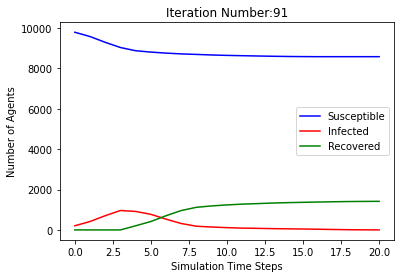

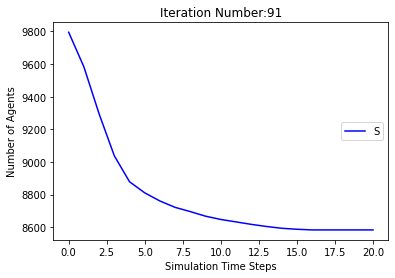

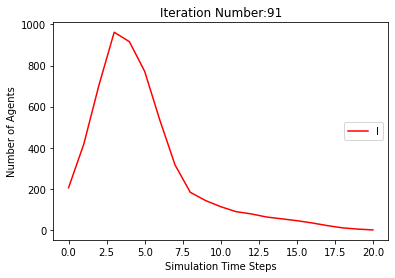

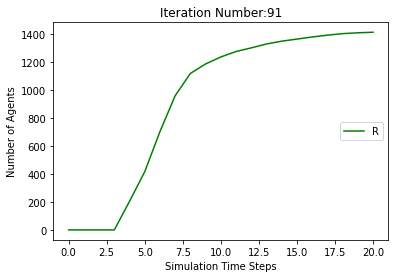

[9795, 9587, 9314, 9041, 8869, 8778, 8718, 8671, 8631, 8590, 8554, 8525, 8510, 8504, 8501, 8500, 8500, 8500, 8500, 8500]
[205, 413, 686, 959, 926, 809, 596, 370, 238, 188, 164, 146, 121, 86, 53, 25, 10, 4, 1, 0]
[0, 0, 0, 0, 205, 413, 686, 959, 1131, 1222, 1282, 1329, 1369, 1410, 1446, 1475, 1490, 1496, 1499, 1500]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 859

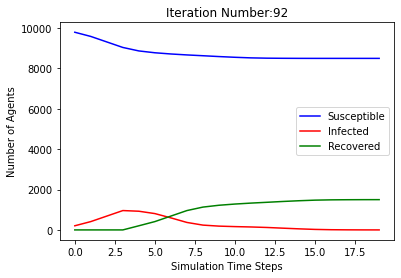

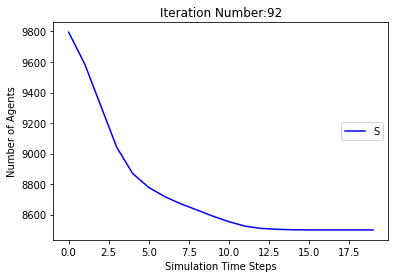

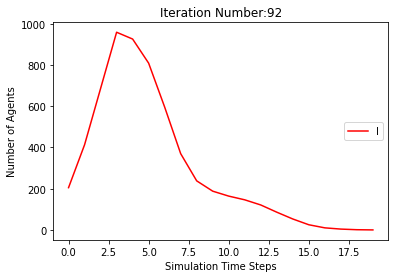

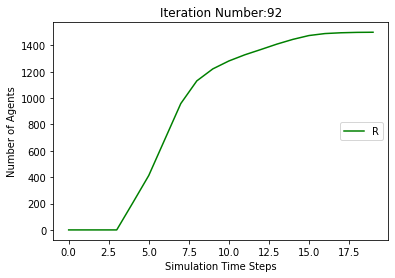

[9795, 9568, 9289, 9032, 8859, 8762, 8686, 8614, 8542, 8479, 8429, 8393, 8369, 8353, 8343, 8332, 8322, 8315, 8313, 8313, 8313, 8313, 8313]
[205, 432, 711, 968, 936, 806, 603, 418, 317, 283, 257, 221, 173, 126, 86, 61, 47, 38, 30, 19, 9, 2, 0]
[0, 0, 0, 0, 205, 432, 711, 968, 1141, 1238, 1314, 1386, 1458, 1521, 1571, 1607, 1631, 1647, 1657, 1668, 1678, 1685, 1687]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 93

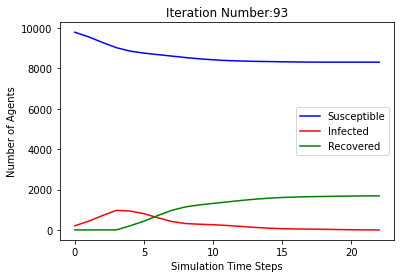

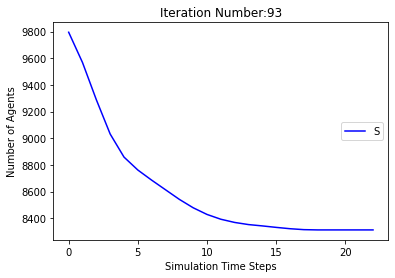

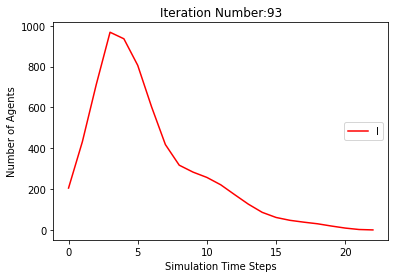

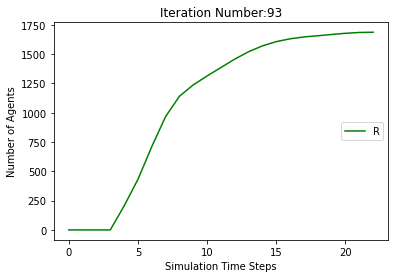

[9795, 9595, 9314, 9026, 8843, 8766, 8708, 8662, 8611, 8591, 8576, 8560, 8547, 8540, 8535, 8530, 8530, 8529, 8529, 8529, 8529, 8529]
[205, 405, 686, 974, 952, 829, 606, 364, 232, 175, 132, 102, 64, 51, 41, 30, 17, 11, 6, 1, 1, 0]
[0, 0, 0, 0, 205, 405, 686, 974, 1157, 1234, 1292, 1338, 1389, 1409, 1424, 1440, 1453, 1460, 1465, 1470, 1470, 1471]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 875

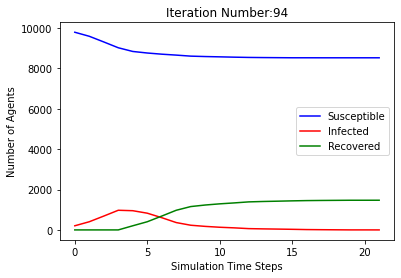

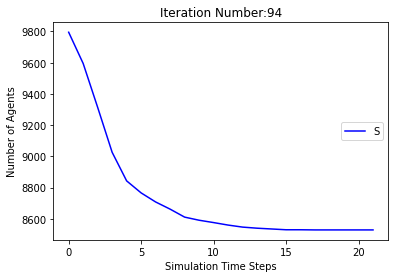

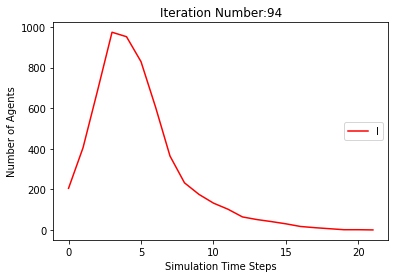

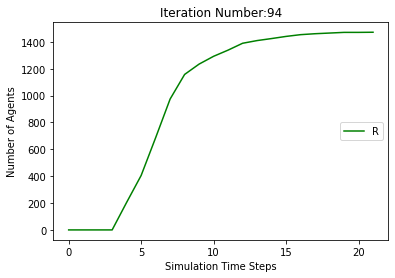

[9795, 9601, 9327, 9071, 8908, 8819, 8744, 8670, 8622, 8576, 8535, 8509, 8501, 8501, 8501, 8501, 8501]
[205, 399, 673, 929, 887, 782, 583, 401, 286, 243, 209, 161, 121, 75, 34, 8, 0]
[0, 0, 0, 0, 205, 399, 673, 929, 1092, 1181, 1256, 1330, 1378, 1424, 1465, 1491, 1499]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 8634, 8613, 8593, 8571, 8561, 8557, 8557, 8555, 8555, 8555, 85

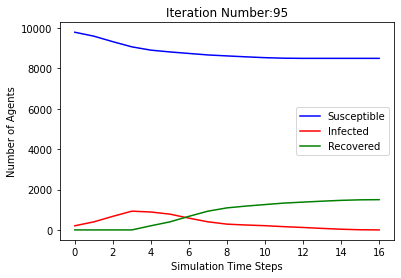

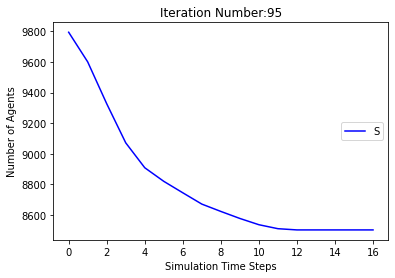

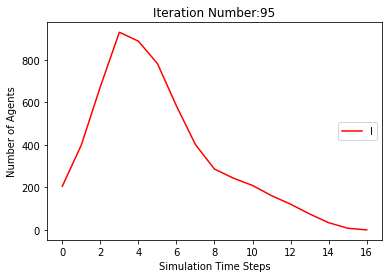

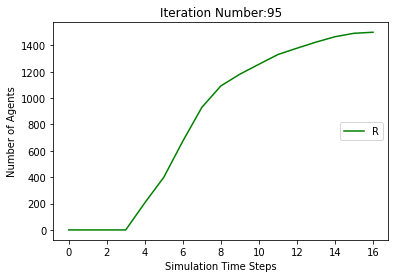

[9795, 9584, 9317, 9054, 8891, 8820, 8763, 8720, 8680, 8650, 8625, 8615, 8598, 8594, 8588, 8580, 8578, 8576, 8576, 8576, 8576, 8576]
[205, 416, 683, 946, 904, 764, 554, 334, 211, 170, 138, 105, 82, 56, 37, 35, 20, 18, 12, 4, 2, 0]
[0, 0, 0, 0, 205, 416, 683, 946, 1109, 1180, 1237, 1280, 1320, 1350, 1375, 1385, 1402, 1406, 1412, 1420, 1422, 1424]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 87

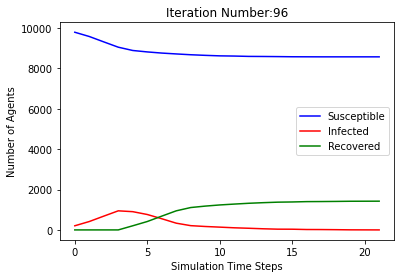

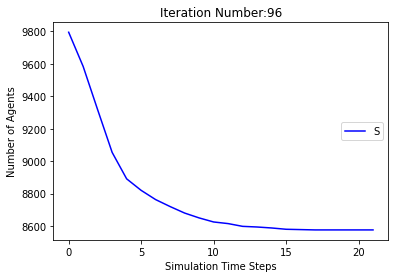

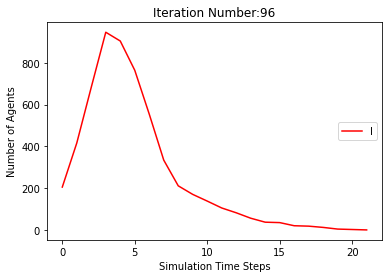

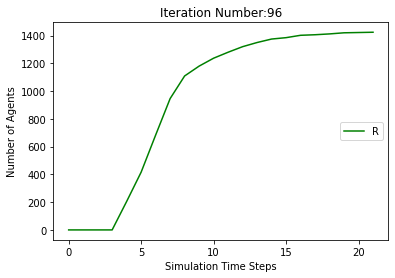

[9795, 9583, 9328, 9071, 8884, 8783, 8712, 8646, 8587, 8539, 8487, 8444, 8403, 8386, 8379, 8375, 8358, 8350, 8343, 8337, 8334, 8334, 8331, 8331, 8331, 8331, 8331]
[205, 417, 672, 929, 911, 800, 616, 425, 297, 244, 225, 202, 184, 153, 108, 69, 45, 36, 36, 38, 24, 16, 12, 6, 3, 3, 0]
[0, 0, 0, 0, 205, 417, 672, 929, 1116, 1217, 1288, 1354, 1413, 1461, 1513, 1556, 1597, 1614, 1621, 1625, 1642, 1650, 1657, 1663, 1666, 1666, 1669]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 

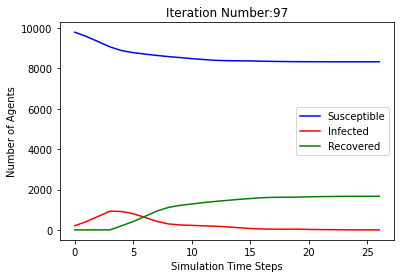

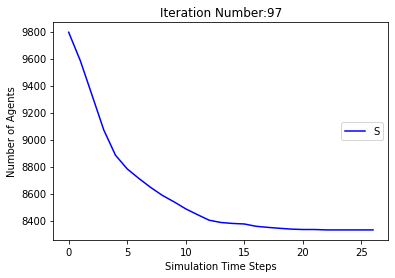

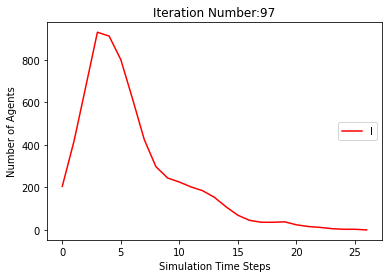

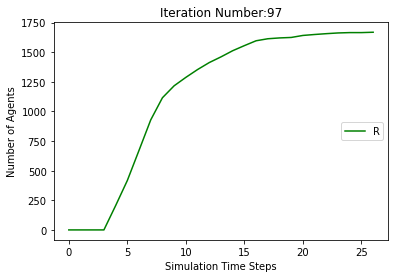

[9795, 9580, 9304, 9067, 8883, 8785, 8727, 8670, 8639, 8592, 8560, 8522, 8490, 8467, 8449, 8434, 8423, 8414, 8408, 8406, 8405, 8404, 8401, 8398, 8394, 8391, 8390, 8389, 8388, 8386, 8385, 8385, 8385, 8385, 8385]
[205, 420, 696, 933, 912, 795, 577, 397, 244, 193, 167, 148, 149, 125, 111, 88, 67, 53, 41, 28, 18, 10, 7, 8, 11, 13, 11, 9, 6, 5, 5, 4, 3, 1, 0]
[0, 0, 0, 0, 205, 420, 696, 933, 1117, 1215, 1273, 1330, 1361, 1408, 1440, 1478, 1510, 1533, 1551, 1566, 1577, 1586, 1592, 1594, 1595, 1596, 1599, 1602, 1606, 1609, 1610, 1611, 1612, 1614, 1615]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 

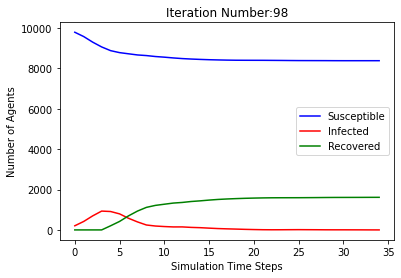

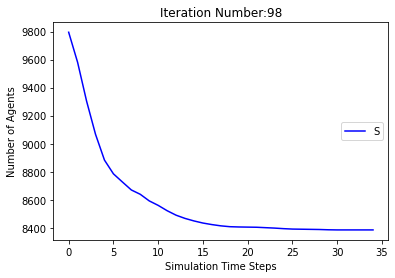

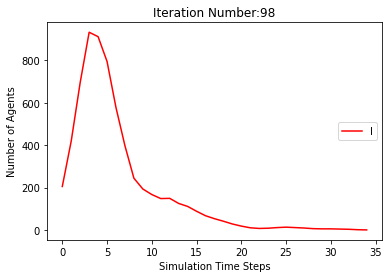

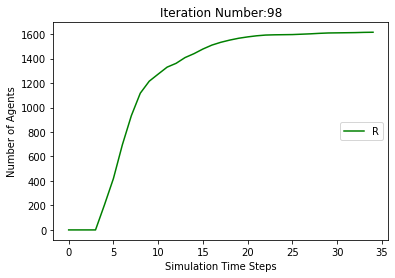

[9795, 9599, 9324, 9076, 8887, 8812, 8762, 8727, 8696, 8682, 8669, 8659, 8651, 8645, 8636, 8631, 8629, 8627, 8626, 8626, 8626, 8626, 8625, 8625, 8625, 8625, 8625]
[205, 401, 676, 924, 908, 787, 562, 349, 191, 130, 93, 68, 45, 37, 33, 28, 22, 18, 10, 5, 3, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 205, 401, 676, 924, 1113, 1188, 1238, 1273, 1304, 1318, 1331, 1341, 1349, 1355, 1364, 1369, 1371, 1373, 1374, 1374, 1374, 1374, 1375]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 846

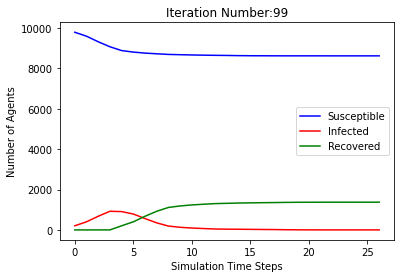

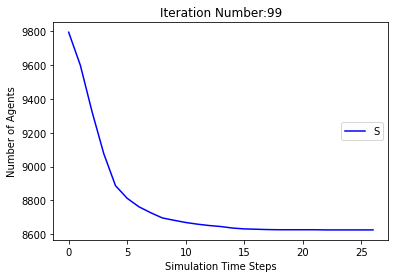

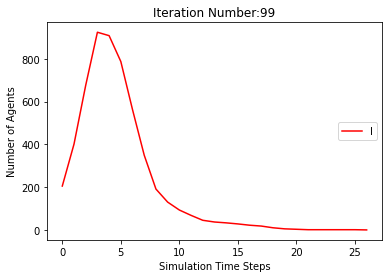

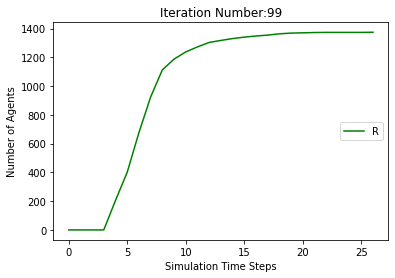

[9795, 9578, 9295, 9057, 8880, 8793, 8734, 8687, 8644, 8606, 8578, 8562, 8549, 8542, 8534, 8531, 8529, 8529, 8529, 8529, 8529]
[205, 422, 705, 943, 915, 785, 561, 370, 236, 187, 156, 125, 95, 64, 44, 31, 20, 13, 5, 2, 0]
[0, 0, 0, 0, 205, 422, 705, 943, 1120, 1207, 1266, 1313, 1356, 1394, 1422, 1438, 1451, 1458, 1466, 1469, 1471]
[[], [9795, 9601, 9329, 9081, 8912, 8812, 8746, 8679, 8616, 8560, 8495, 8432, 8376, 8339, 8310, 8286, 8275, 8269, 8265, 8261, 8259, 8255, 8250, 8246, 8240, 8237, 8234, 8233, 8233, 8233, 8233, 8233], [9795, 9586, 9290, 9031, 8838, 8757, 8722, 8686, 8655, 8622, 8597, 8569, 8558, 8548, 8541, 8536, 8534, 8534, 8534, 8534, 8534], [9795, 9589, 9330, 9054, 8898, 8810, 8753, 8697, 8666, 8650, 8634, 8615, 8607, 8605, 8605, 8604, 8603, 8601, 8601, 8601, 8601, 8601], [9795, 9611, 9348, 9104, 8887, 8796, 8732, 8682, 8636, 8605, 8578, 8560, 8542, 8523, 8507, 8490, 8479, 8474, 8469, 8464, 8463, 8462, 8462, 8462, 8462, 8462], [9795, 9588, 9301, 9028, 8849, 8755, 8704, 8669, 

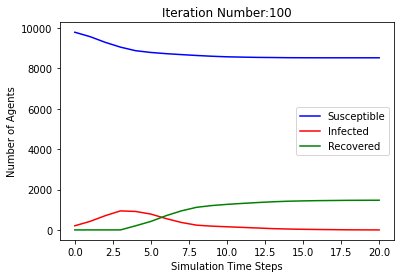

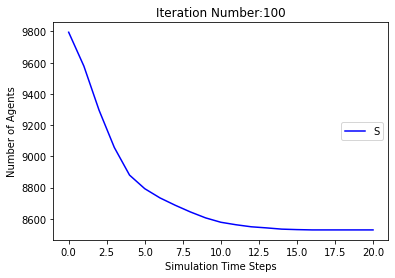

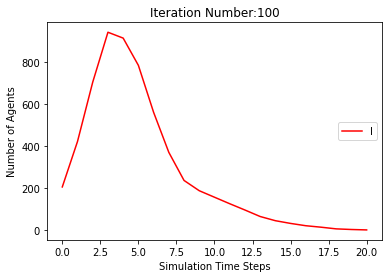

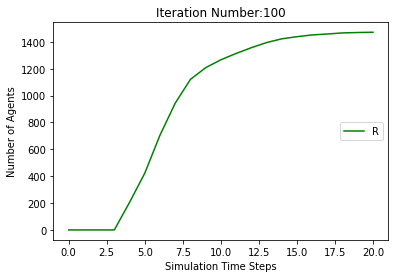

In [10]:
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

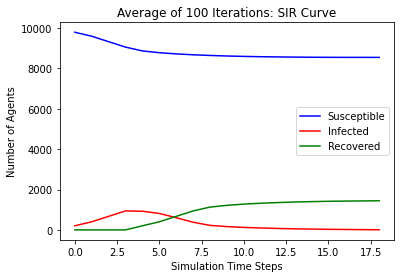

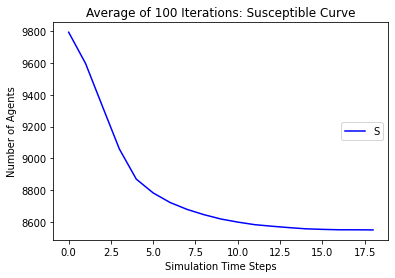

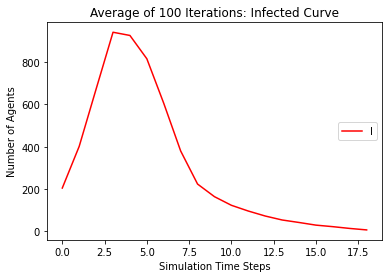

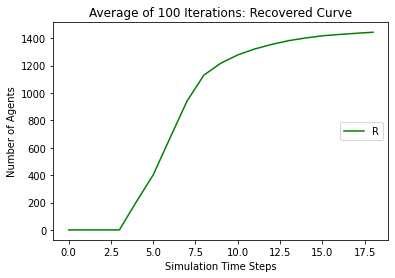

In [11]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
